<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:180%;
           font-family:Oswald;
           letter-spacing:0.7px">

<p style= "padding: 5px;
                  color:white;">
    
    
<p style = "text-align:center;"> Time Series Analysis ,Forcasting and Prediction📅📉⏰📊

</p>
</div>

# Introduction:
- Basically Time series analysis is a specific way of analyzing a sequence of data points collected over an interval of time.Time series analysis helps organizations understand the underlying causes of trends or systemic patterns over time. Using data visualizations, business users can see seasonal trends and dig deeper into why these trends occur.


# Primary Objectives:
- show weekly, monthly seasonality of the data between united states and england
- visualize resampled data of daly weekly and monthly frequency between united states and england
- correctly show a rolling mean of 7days and 30days between united states and england
- accurately show a forcast of 10 years for either united states **or** england(choose one)
- build a predictive model for the target variable for either united states **or** england(choose one)

# About dataset:
- This dataset shows the  power utility levels between United States and England from year 2001-2022

In [1]:
# importing required librabries
import pandas as pd
import seaborn as sns
import matplotlib .pyplot as plt
import numpy as np
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
from plotly import subplots
from plotly.subplots import make_subplots
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")
import matplotlib.style as style
style.available
df = pd.read_csv("Energy_data_usage_USA.csv", parse_dates=["Date"], index_col=["Date"])
df.head(1)

Unnamed: 0  United States : all sectors  \
Date                                                  
2001-01-01           0                       332493   

            United States : electric utility  \
Date                                           
2001-01-01                            236467   

            United States : independent power producers  \
Date                                                      
2001-01-01                                        82269   

            United States : all commercial  United States : all industrial  \
Date                                                                         
2001-01-01                             629                           13128   

            New England : all sectors  New England : electric utility  \
Date                                                                    
2001-01-01                      10005                            2467   

            New England : electric utility.1  \
Date                                           
2001-01-01                              2467   

            New England : independent power producers  \
Date                                                    
2001-01-01                                       6959   

            New England : all commercial  New England : all industrial  
Date                                                                    
2001-01-01                            68                           510

In [2]:
# dropping Unneeded columns
df = df.drop(["Unnamed: 0", "New England : electric utility.1"], axis = 1, )

In [3]:
# DatetimeIndex of dataset
df.index

DatetimeIndex(['2001-01-01', '2001-02-01', '2001-03-01', '2001-04-01',
               '2001-05-01', '2001-06-01', '2001-07-01', '2001-08-01',
               '2001-09-01', '2001-10-01',
               ...
               '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01',
               '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01',
               '2022-02-01', '2022-03-01'],
              dtype='datetime64[ns]', name='Date', length=255, freq=None)

In [4]:
# splitting index into weeks months and year
df.index=pd.to_datetime(df.index)
df["days_of_the week"]=df.index.dayofweek
df["weeks of the year"]=df.index.week
df["months of the year"]= df.index.month
df["year"]=df.index.year

In [5]:
df.head(1)

United States : all sectors  United States : electric utility  \
Date                                                                        
2001-01-01                       332493                            236467   

            United States : independent power producers  \
Date                                                      
2001-01-01                                        82269   

            United States : all commercial  United States : all industrial  \
Date                                                                         
2001-01-01                             629                           13128   

            New England : all sectors  New England : electric utility  \
Date                                                                    
2001-01-01                      10005                            2467   

            New England : independent power producers  \
Date                                                    
2001-01-01                                       6959   

            New England : all commercial  New England : all industrial  \
Date                                                                     
2001-01-01                            68                           510   

            days_of_the week  weeks of the year  months of the year  year  
Date                                                                       
2001-01-01                 0                  1                   1  2001

In [6]:
#checking data achitecture
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 255 entries, 2001-01-01 to 2022-03-01
Data columns (total 14 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   United States : all sectors                  255 non-null    int64
 1   United States : electric utility             255 non-null    int64
 2   United States : independent power producers  255 non-null    int64
 3   United States : all commercial               255 non-null    int64
 4   United States : all industrial               255 non-null    int64
 5   New England : all sectors                    255 non-null    int64
 6   New England : electric utility               255 non-null    int64
 7   New England : independent power producers    255 non-null    int64
 8   New England : all commercial                 255 non-null    int64
 9   New England : all industrial                 255 non-null    int64
 10  days_of

# Daily Seasonality

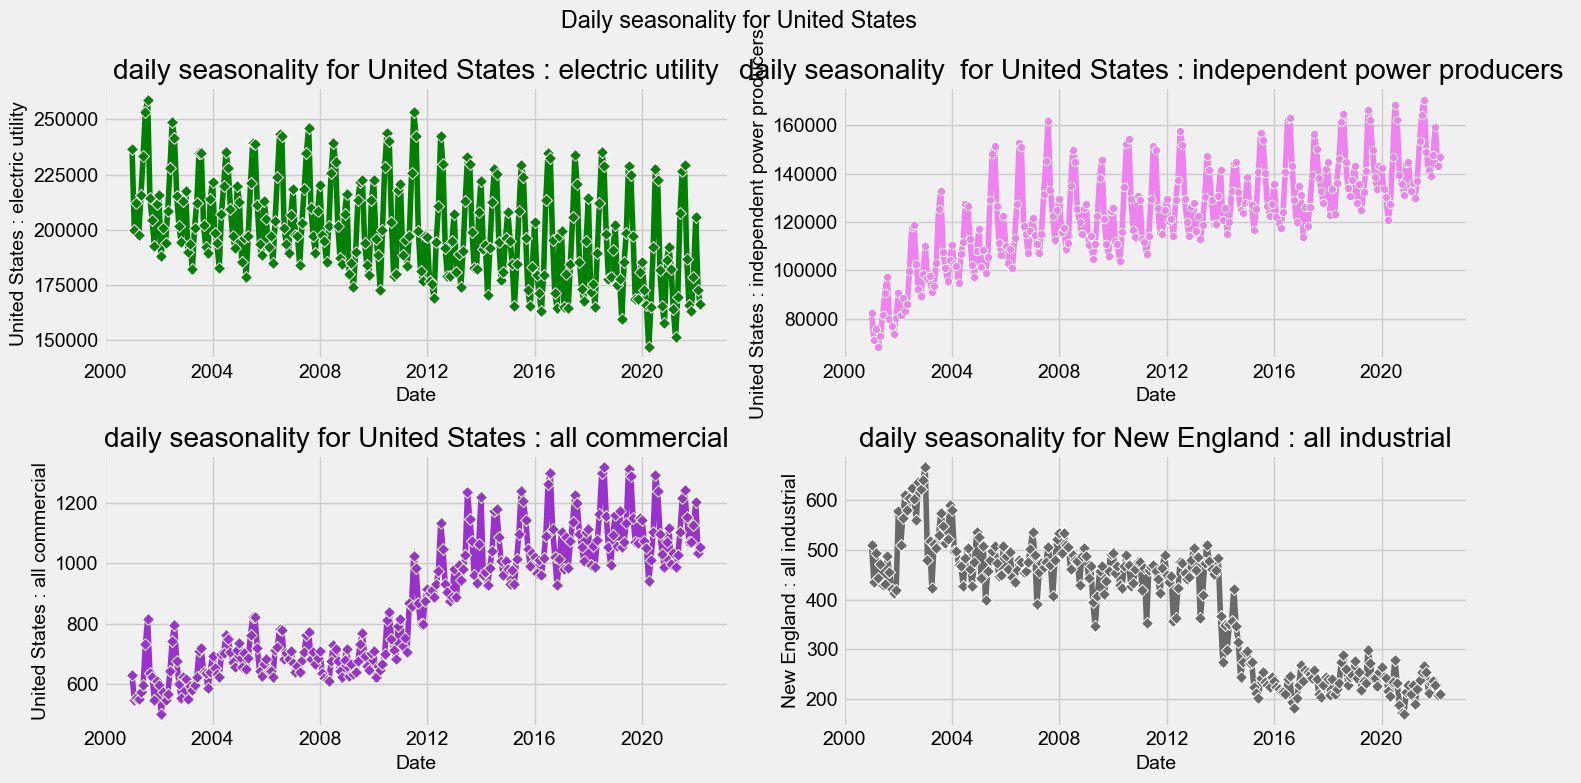

In [7]:
# plot suplots for daily seasonality in united states
plt.style.use("fivethirtyeight")
fig,axs = plt.subplots (nrows=2, ncols=2, sharey=False ,figsize= (15,8))
fig.suptitle("Daily seasonality for United States")
g= sns.lineplot(df["United States : electric utility"],ax=axs[0,0],marker="D",color ="green")
g.set_title("daily seasonality for United States : electric utility")
g= sns.lineplot(df["United States : independent power producers"], ax=axs[0,1], marker="o",color="violet")
g.set_title("daily seasonality  for United States : independent power producers ")
g= sns.lineplot(df["United States : all commercial"],ax=axs[1,0],marker="D",color="darkorchid")
g.set_title("daily seasonality for United States : all commercial")
g= sns.lineplot( df["New England : all industrial"],ax=axs[1,1],marker="D",color="dimgray")
g.set_title("daily seasonality for New England : all industrial")
g = sns.set_style("darkgrid")
fig.tight_layout()
plt.show()


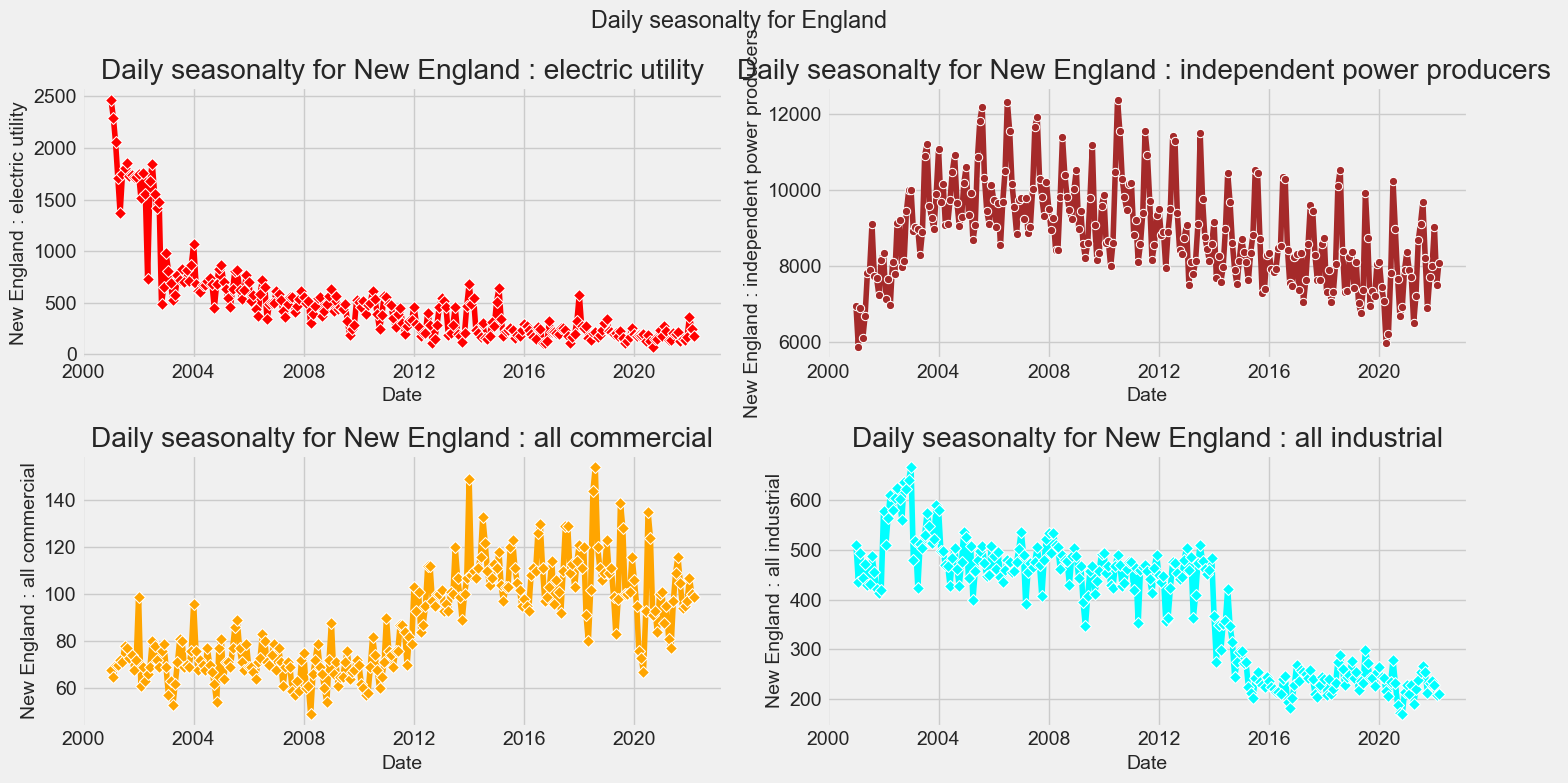

In [8]:
# plot suplots for daily seasonality in England
style.use("fivethirtyeight")
fig,axs = plt.subplots (nrows=2, ncols=2, sharey=False ,figsize= (15,8))
fig.suptitle("Daily seasonalty for England")
g= sns.lineplot(df["New England : electric utility"],ax=axs[0,0],marker="D",color ="red")
g.set_title("Daily seasonalty for New England : electric utility")
g= sns.lineplot(df["New England : independent power producers"], ax=axs[0,1], marker="o",color="brown")
g.set_title(  "Daily seasonalty for New England : independent power producers ")
g= sns.lineplot(df["New England : all commercial"],ax=axs[1,0],marker="D",color="orange")
g.set_title("Daily seasonalty for New England : all commercial")
g= sns.lineplot( df["New England : all industrial"],ax=axs[1,1],marker="D",color="cyan")
g.set_title("Daily seasonalty for New England : all industrial")
g = sns.set_style("darkgrid")
fig.tight_layout()
plt.show()

# loc in timeseries
One of the most powerful and convenient features of pandas time series is time-based indexing — using dates and times to intuitively organize and access our data. With time-based indexing, we can use date/time formatted strings to select data in our DataFrame with the loc accessor. The indexing works similar to standard label-based indexing with loc, but with a few additional features.

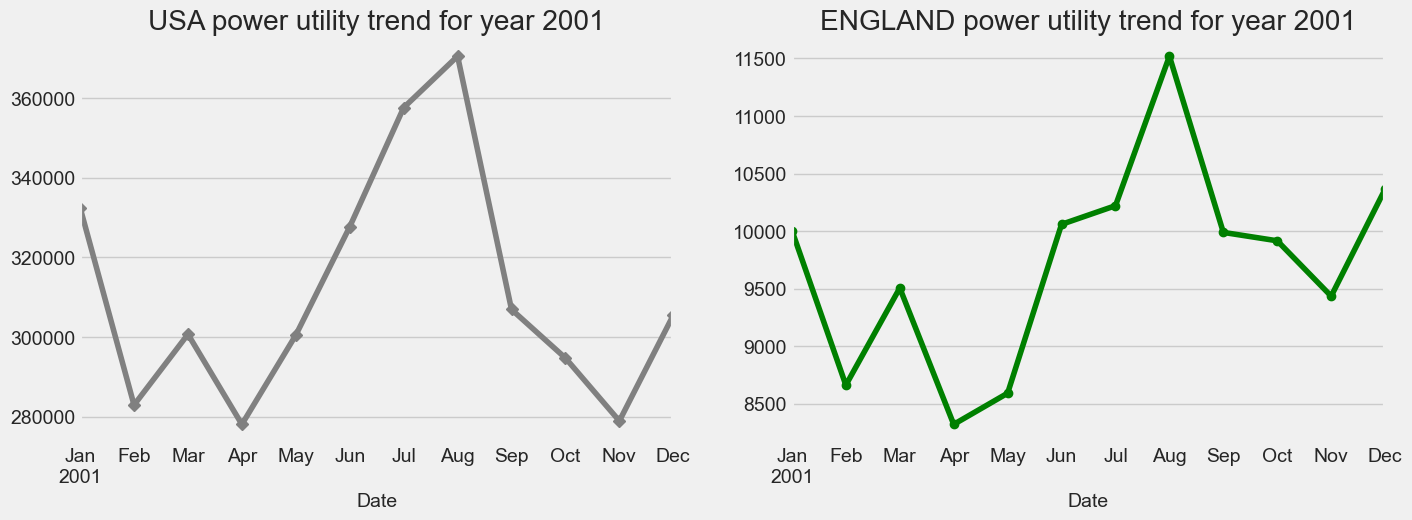

In [9]:
# plot suplots monthly subplots for single year for USA and England
style.use("fivethirtyeight")
f,ax = plt.subplots (1,2,figsize = (15 ,5)) 
df.loc["2001", "United States : all sectors"].plot(ax = ax [0],marker="D",color="gray" ,title="USA power utility trend for year 2001")
df.loc["2001", "New England : all sectors"].plot(ax = ax [1],marker="o",color="green" ,title="ENGLAND power utility trend for year 2001")

plt.show ()

In [10]:
# show data archetecture
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 255 entries, 2001-01-01 to 2022-03-01
Data columns (total 14 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   United States : all sectors                  255 non-null    int64
 1   United States : electric utility             255 non-null    int64
 2   United States : independent power producers  255 non-null    int64
 3   United States : all commercial               255 non-null    int64
 4   United States : all industrial               255 non-null    int64
 5   New England : all sectors                    255 non-null    int64
 6   New England : electric utility               255 non-null    int64
 7   New England : independent power producers    255 non-null    int64
 8   New England : all commercial                 255 non-null    int64
 9   New England : all industrial                 255 non-null    int64
 10  days_of

# weekly seasonality

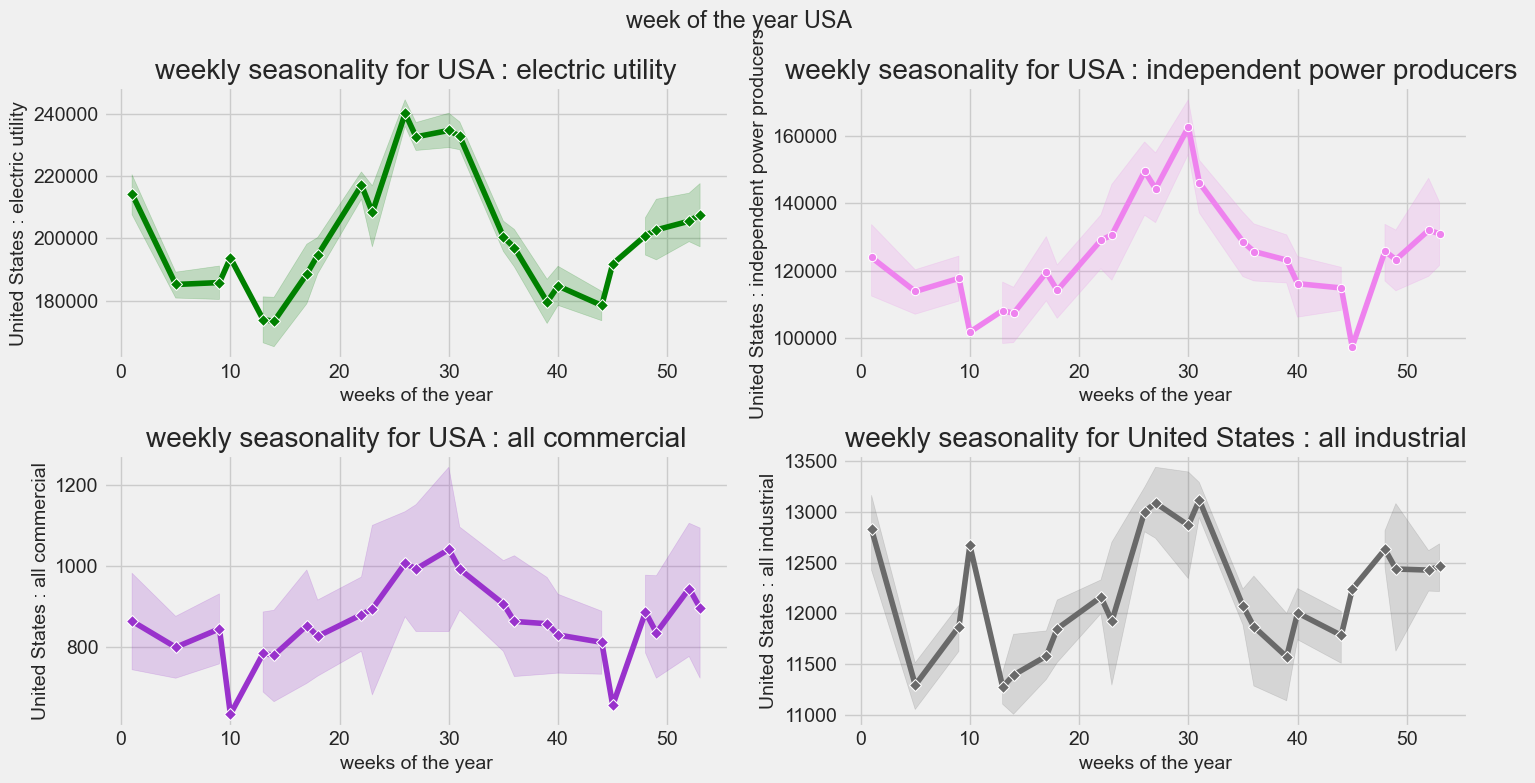

In [11]:
# plot suplots for weekly seasonality in united states
style.use("fivethirtyeight")
fig,axs = plt.subplots (nrows=2, ncols=2, sharey=False ,figsize= (15,8))
fig.suptitle('week of the year USA')
g= sns.lineplot(x=df["weeks of the year"], y=df["United States : electric utility"],ax=axs[0,0],marker="D",color ="green")
g.set_title("weekly seasonality for USA : electric utility")
g= sns.lineplot(x=df["weeks of the year"],y=df["United States : independent power producers"], ax=axs[0,1], marker="o",color="violet")
g.set_title( "weekly seasonality for USA : independent power producers ")
g= sns.lineplot(x=df["weeks of the year"],y=df["United States : all commercial"],ax=axs[1,0],marker="D",color="darkorchid")
g.set_title("weekly seasonality for USA : all commercial")
g= sns.lineplot( x=df["weeks of the year"],y=df["United States : all industrial"],ax=axs[1,1],marker="D",color="dimgray")
g.set_title("weekly seasonality for United States : all industrial")
g = sns.set_style("darkgrid")
fig.tight_layout()
plt.show()


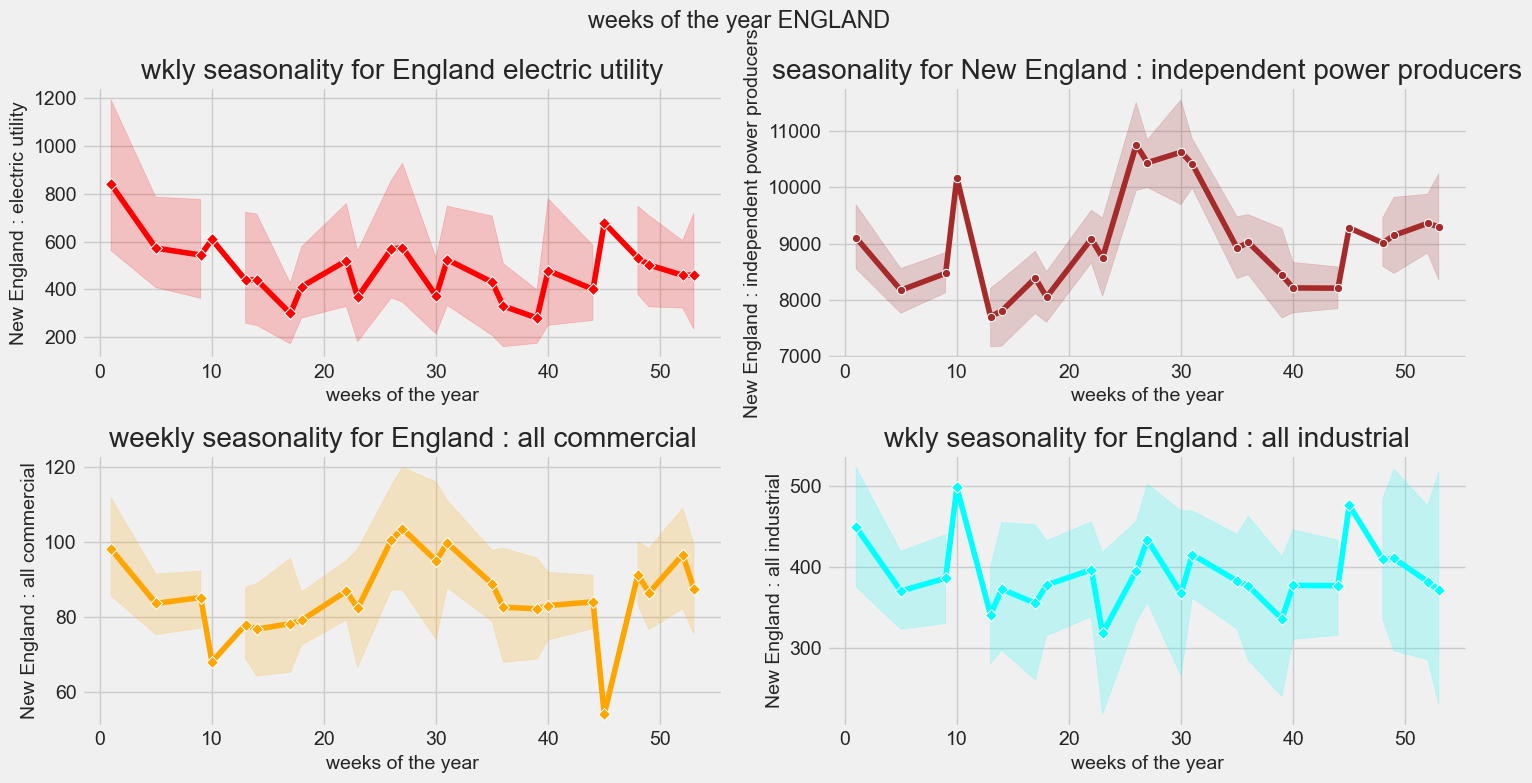

In [12]:
# plot suplots for weekly seasonality in england
style.use("fivethirtyeight")
fig,axs = plt.subplots (nrows=2, ncols=2, sharey=False ,figsize= (15,8))
fig.suptitle("weeks of the year ENGLAND")
g= sns.lineplot(x=df["weeks of the year"], y=df["New England : electric utility"],ax=axs[0,0],marker="D",color ="red")
g.set_title("wkly seasonality for England electric utility")
g= sns.lineplot(x=df["weeks of the year"],y=df["New England : independent power producers"], ax=axs[0,1], marker="o",color="brown")
g.set_title(  "seasonality for New England : independent power producers")
g= sns.lineplot(x=df["weeks of the year"],y=df["New England : all commercial"],ax=axs[1,0],marker="D",color="orange")
g.set_title("weekly seasonality for England : all commercial")
g= sns.lineplot(x=df["weeks of the year"],y=df["New England : all industrial"],ax=axs[1,1],marker="D",color="cyan")
g.set_title("wkly seasonality for England : all industrial")
fig.tight_layout()
plt.show()

# monthly seasonality


- the seasonality of our data with lineplots, using seaborn's lineplot() function to group the data by different time periods and display the distributions for each group. We'll first group the data by month, to visualize yearly seasonality.

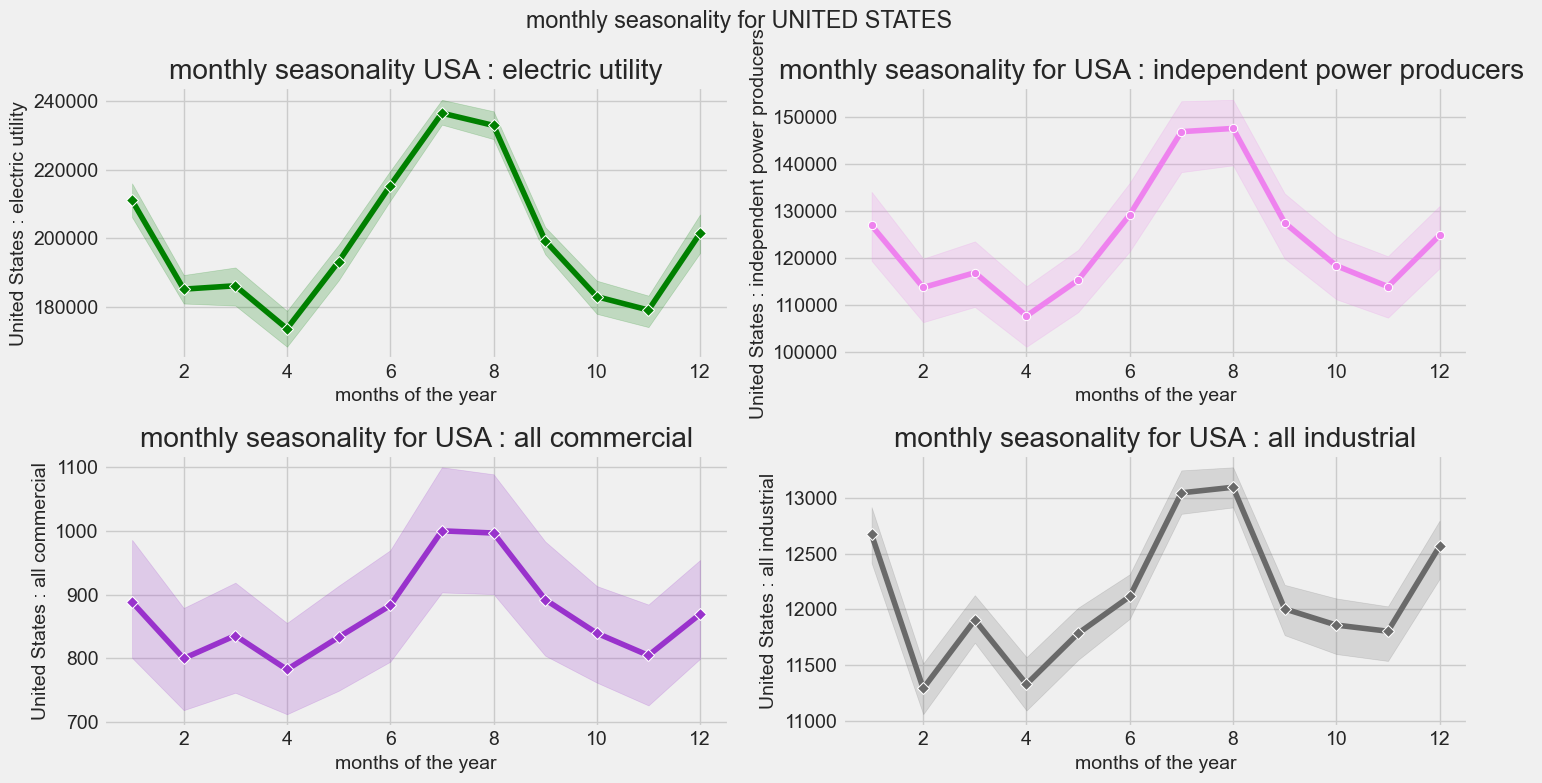

In [13]:
# plot suplots for monthly seasonality in united states
style.use("fivethirtyeight")
fig,axs = plt.subplots (nrows=2, ncols=2, sharey=False ,figsize= (15,8))
fig.suptitle("monthly seasonality for UNITED STATES")
g= sns.lineplot(x=df["months of the year"], y=df["United States : electric utility"],ax=axs[0,0],marker="D",color ="green")
g.set_title("monthly seasonality USA : electric utility")
g= sns.lineplot(x=df["months of the year"],y=df["United States : independent power producers"], ax=axs[0,1], marker="o",color="violet")
g.set_title(  "monthly seasonality for USA : independent power producers ")
g= sns.lineplot(x=df["months of the year"],y=df["United States : all commercial"],ax=axs[1,0],marker="D",color="darkorchid")
g.set_title("monthly seasonality for USA : all commercial")
g= sns.lineplot( x=df["months of the year"],y=df["United States : all industrial"],ax=axs[1,1],marker="D",color="dimgray")
g.set_title("monthly seasonality for USA : all industrial")
g = sns.set_style("darkgrid")
fig.tight_layout()
plt.show()


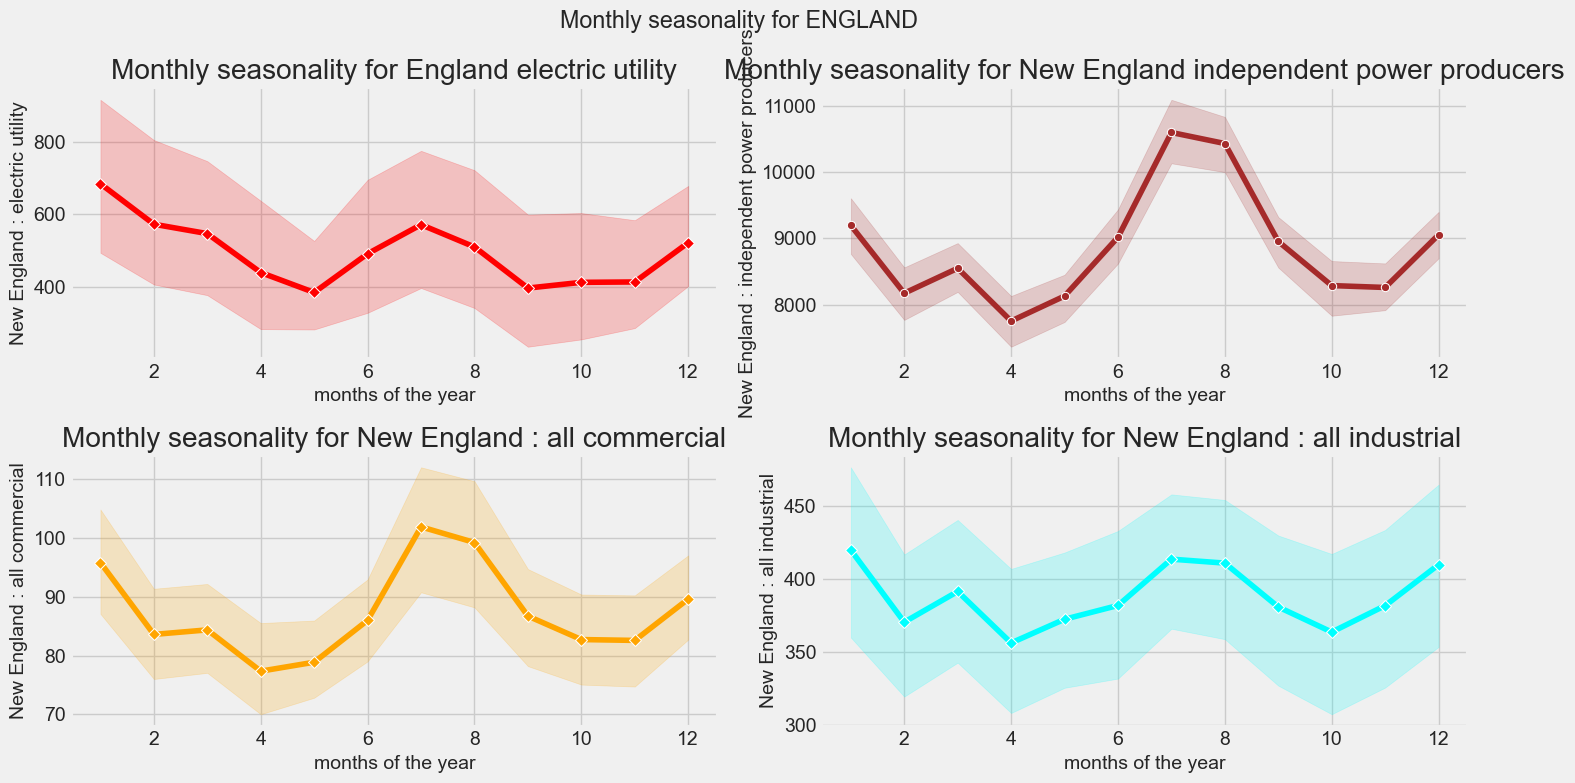

In [14]:
# plot suplots for monthly seasonality in united states
style.use("fivethirtyeight")
fig,axs = plt.subplots (nrows=2, ncols=2, sharey=False ,figsize= (15,8))
fig.suptitle("Monthly seasonality for ENGLAND")
g= sns.lineplot(x=df["months of the year"], y=df["New England : electric utility"],ax=axs[0,0],marker="D",color ="red")
g.set_title("Monthly seasonality for England electric utility")
g= sns.lineplot(x=df["months of the year"],y=df["New England : independent power producers"], ax=axs[0,1], marker="o",color="brown")
g.set_title("Monthly seasonality for New England independent power producers")
g= sns.lineplot(x=df["months of the year"],y=df["New England : all commercial"],ax=axs[1,0],marker="D",color="orange")
g.set_title("Monthly seasonality for New England : all commercial")
g= sns.lineplot(x=df["months of the year"],y=df["New England : all industrial"],ax=axs[1,1],marker="D",color="cyan")
g.set_title("Monthly seasonality for New England : all industrial")
g = sns.set_style("darkgrid")
fig.tight_layout()
plt.show()

# Resampling

- The resampling method transforms time series data that are occurring in irregular time intervals into equispaced data. The method is also useful for transforming equispaced data from one frequency level to another (for example, minutes to hours ,hours to days,days to weeks,weeks to months and months to year).

 ## ploting weekly time series over a 10 month period(rsp)

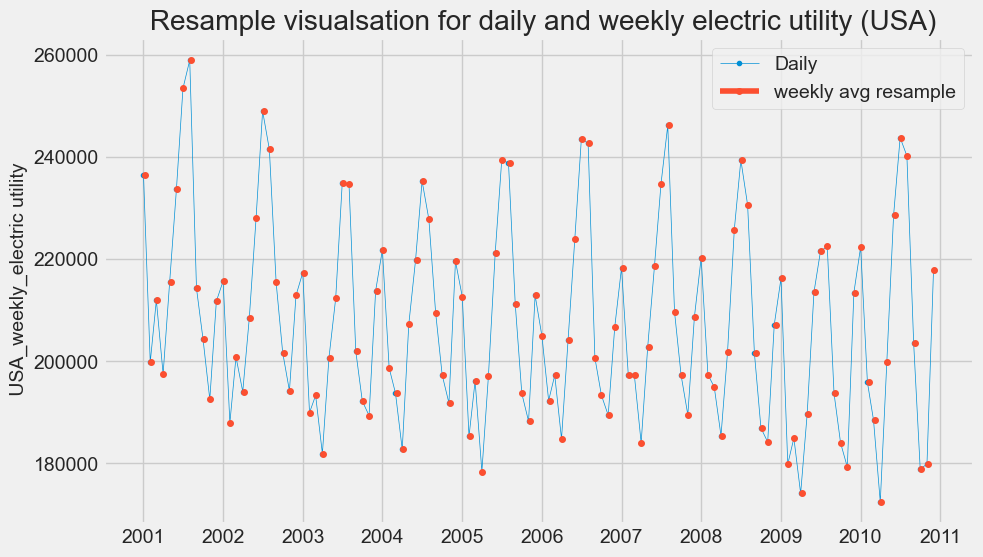

In [15]:
# plot style
style.use("fivethirtyeight")
#  create  new data 
cols_USA = ["United States : electric utility","United States : independent power producers","United States : all industrial"
       ,"United States : all commercial"]
# resample data to weekly frequency
df_weekly_rsp_USA =  df[cols_USA].resample("w").mean() # average power utility per week
#create a timeline
start,end =  "2001", "2010"
# plot the resampled data
fig, ax= plt.subplots(figsize=(10 ,6))
ax.plot(df.loc[start:end,"United States : electric utility"],marker=".",linestyle="-", linewidth= 0.5, label="Daily")
ax.plot(df_weekly_rsp_USA.loc[start : end, "United States : electric utility"],marker="." ,markersize=8,linestyle="-", label ="weekly avg resample")
ax.set_ylabel(" USA_weekly_electric utility")
ax.set_title(" Resample visualsation for daily and weekly electric utility (USA)")
ax.legend()
plt.show()

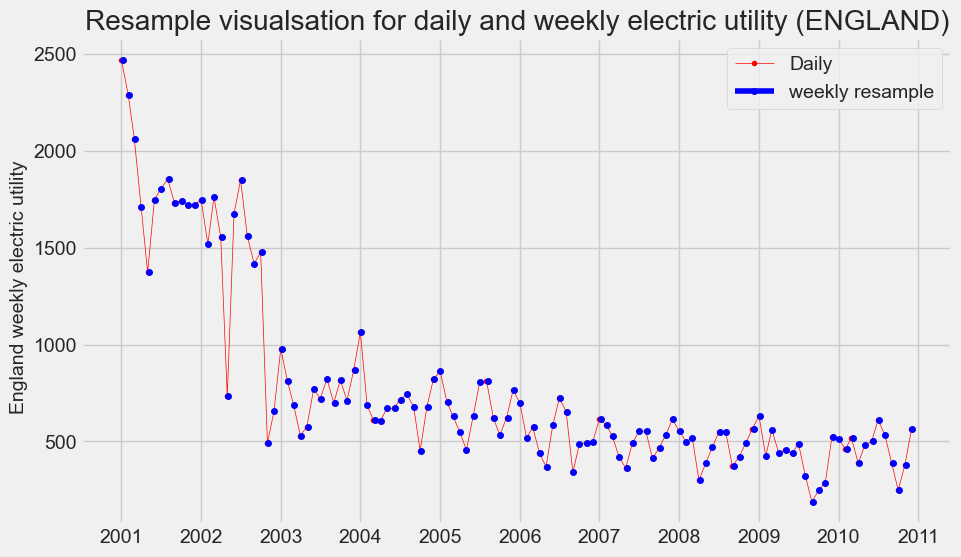

In [16]:
# plot style
style.use("fivethirtyeight")
#  create  new data
cols_ENG = ["New England : electric utility","New England : independent power producers","New England : all industrial"
       ,"New England : all commercial"]
# resample data to weekly frequency
df_weekly_avg_ENG =  df[cols_ENG].resample("w").mean() # average power utility power per week  
#create a timeline
start,end =  "2001", "2010"
# plot the resampled data
fig, ax= plt.subplots(figsize=(10 ,6))
ax.plot(df.loc[start:end,"New England : electric utility"],marker=".",linestyle="-", linewidth= 0.5, label="Daily" ,color="red")
ax.plot(df_weekly_avg_ENG.loc[start : end, "New England : electric utility"],marker="." ,markersize=8,linestyle="-", label ="weekly resample" ,color="blue")
ax.set_ylabel("England weekly electric utility  ")
ax.set_title("Resample visualsation for daily and weekly electric utility (ENGLAND)")
ax.legend()
plt.show()

## monthly(rsp)

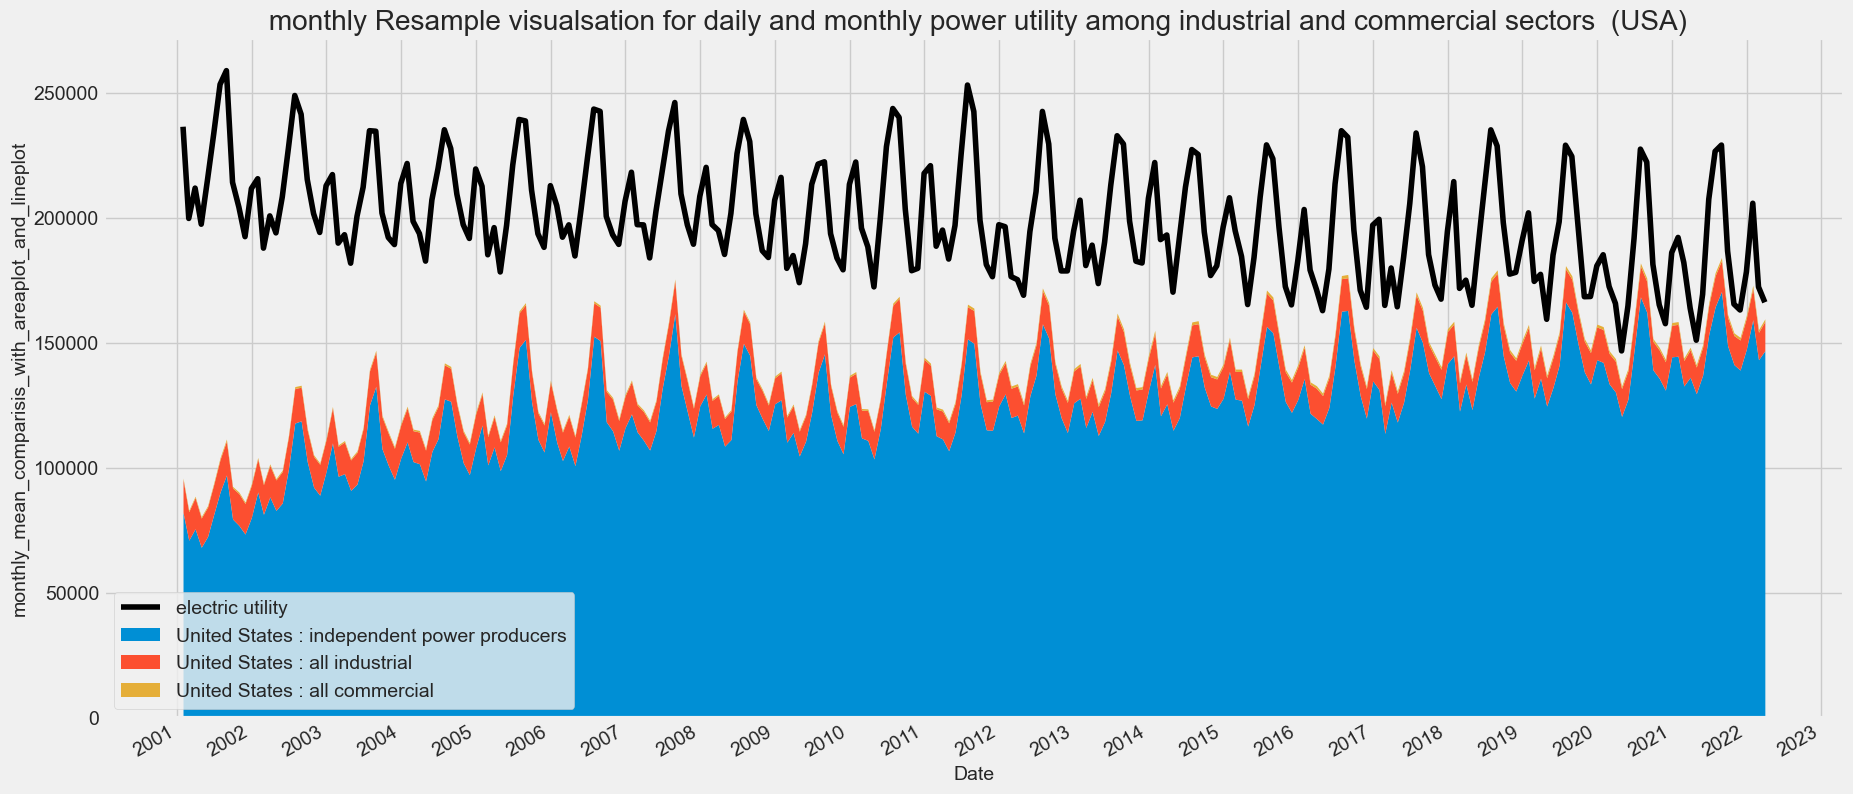

In [17]:
# plot style
style.use("fivethirtyeight")
#  create new data 
df_monthly_USA= df[cols_USA].resample("M").mean() # average power utility power per month
# plot the resampled data
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(df_monthly_USA["United States : electric utility"],color="black",label="electric utility")
df_monthly_USA[["United States : independent power producers","United States : all industrial","United States : all commercial"]].plot.area(ax=ax,linewidth= 0)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_title(" monthly Resample visualsation for daily and monthly power utility among industrial and commercial sectors  (USA)")
ax.set_ylabel("monthly_mean_comparisis_with_areaplot_and_lineplot")
plt.show()

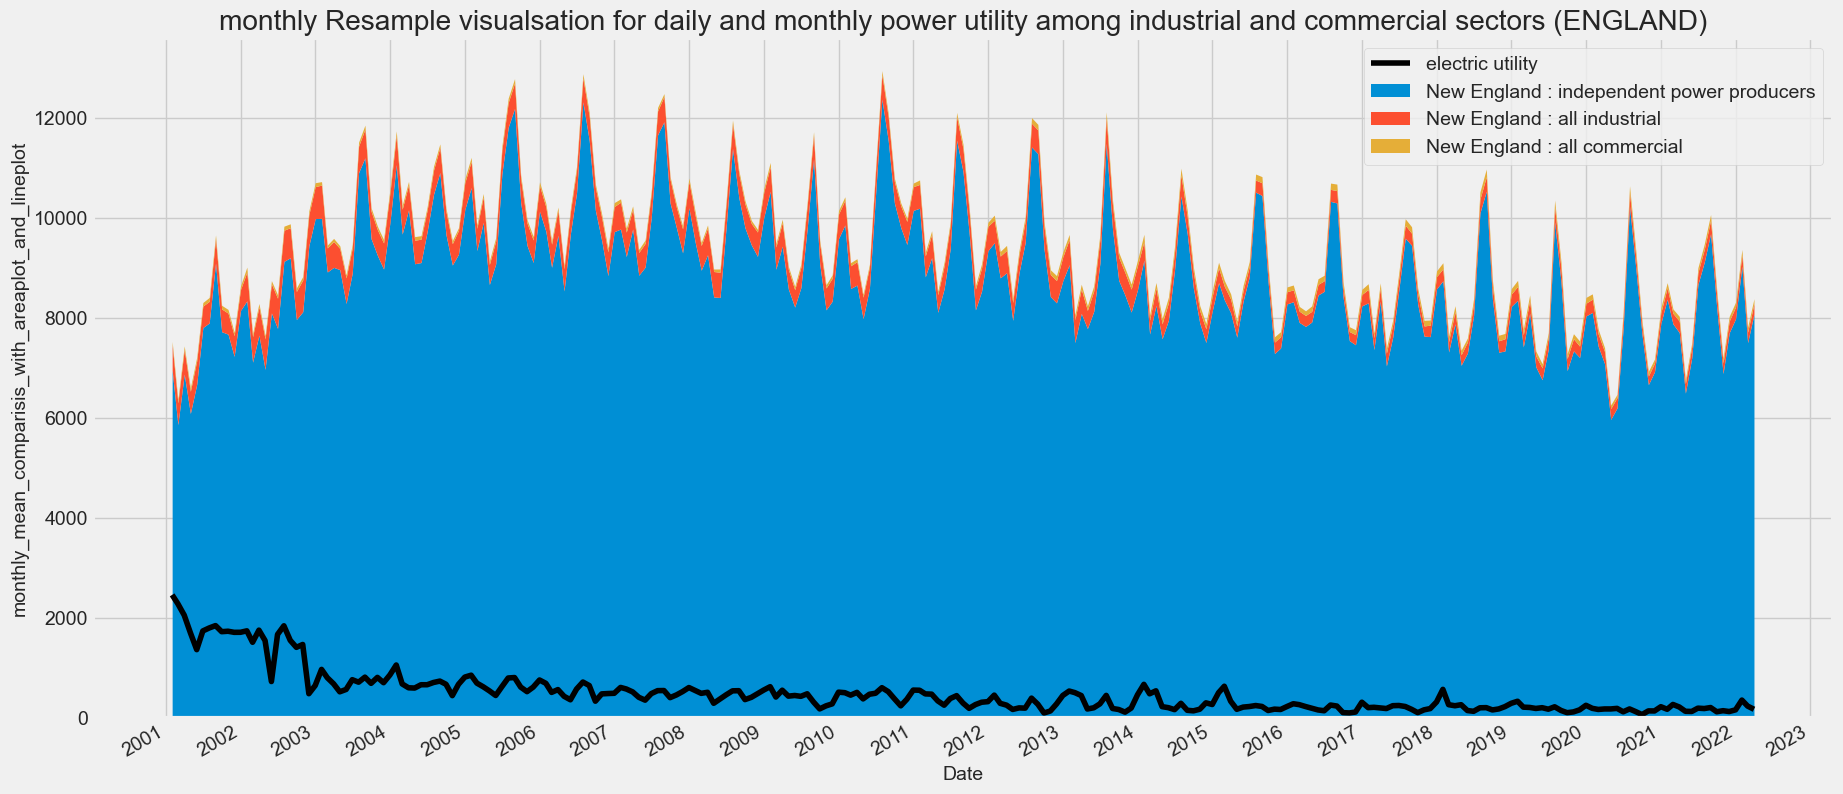

In [18]:
# plot style
style.use("fivethirtyeight")
#  create new data
df_monthly_ENG= df[cols_ENG].resample("M").mean()# average power utility power per month
# plot the resampled data
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(df_monthly_ENG["New England : electric utility"],color="black",label="electric utility")
df_monthly_ENG[["New England : independent power producers","New England : all industrial","New England : all commercial"]].plot.area(ax=ax,linewidth= 0) #for_more ucan add two [[]]
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_title("monthly Resample visualsation for daily and monthly power utility among industrial and commercial sectors (ENGLAND)")
ax.set_ylabel("monthly_mean_comparisis_with_areaplot_and_lineplot")
plt.show()

 ## yearly (rsp)

###  USA Annual Resample in a space of 5 year interval 

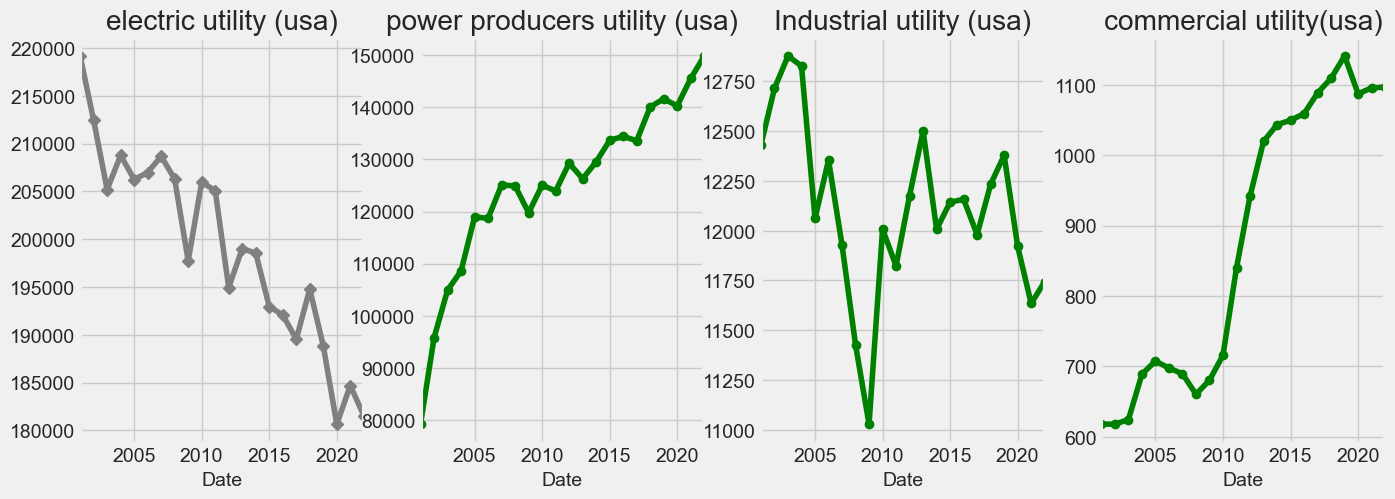

In [19]:
# plot style
style.use("fivethirtyeight")
#  create new data
df_annual_USA= df[cols_USA].resample("A").mean()# average power utility power per year
# plot the resampled data
f,ax = plt.subplots (1,4,figsize = (15 ,5))
df_annual_USA.loc["2001" :, "United States : electric utility"].plot(ax = ax [0],marker="D",color="gray", title="electric utility (usa)")
df_annual_USA.loc["2001" :, "United States : independent power producers"].plot(ax = ax [1],marker="o",color="green",title="power producers utility (usa)")
df_annual_USA.loc["2001" :, "United States : all industrial"].plot(ax = ax [2],marker="o",color="green",title="Industrial utility (usa)")
df_annual_USA.loc["2001" :, "United States : all commercial"].plot(ax = ax [3],marker="o",color="green",title="commercial utility(usa)")


plt.show ()

###  ENGLAND Annual Resample in a space of 5 year intervals

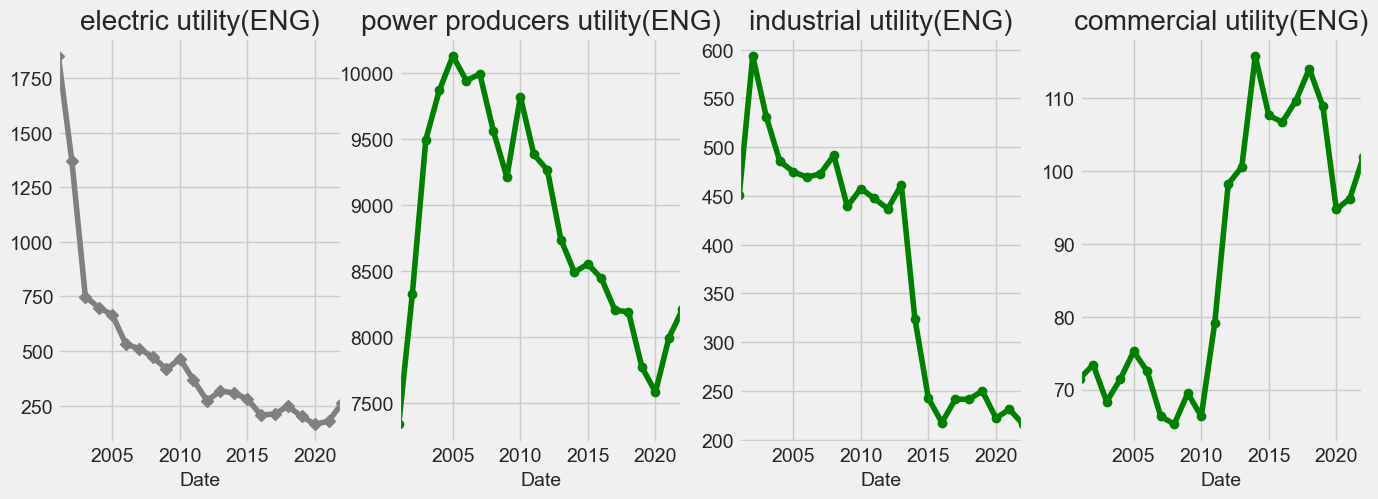

In [20]:
# plot style
style.use("fivethirtyeight")
#  create new data
df_annual_ENG= df[cols_ENG].resample("A").mean()
# plot the resampled data
f,ax = plt.subplots (1,4,figsize = (15 ,5))
df_annual_ENG.loc["2001" :, "New England : electric utility"].plot(ax = ax [0],marker="D",color="gray",title="electric utility(ENG)")
df_annual_ENG.loc["2001" :, "New England : independent power producers"].plot(ax = ax [1],marker="o",color="green" ,title="power producers utility(ENG)")
df_annual_ENG.loc["2001" :, "New England : all industrial"].plot(ax = ax [2],marker="o",color="green",title="industrial utility(ENG)")
df_annual_ENG.loc["2001" :, "New England : all commercial"].plot(ax = ax [3],marker="o",color="green",title="commercial utility(ENG)")

plt.show ()

# TRENDS ( rolling mean()) 7 days


- Rolling Mean, also known as moving average, calculates the mean of the values within the window of values.
- rolling average = sum of data over time / time period.

#### USA 7 day Rolling mean comparision between daily, and weekly mean resample

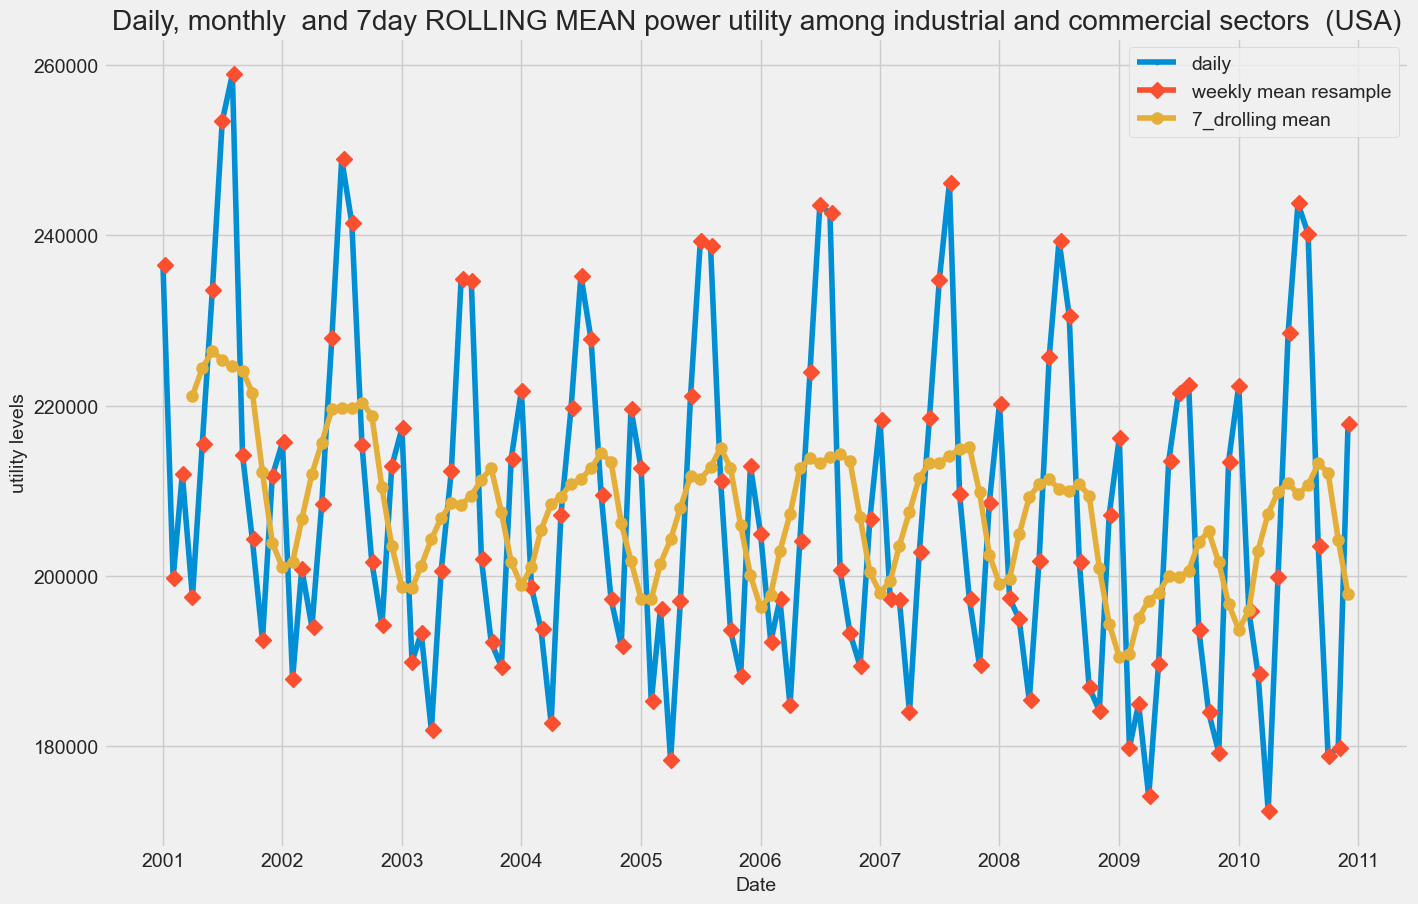

In [21]:
# plot style
style.use("fivethirtyeight")
#  create new rolling data
dfrolling_USA= df[cols_USA].rolling(7, center = True).mean()
# create timeline
start , end= "2001", "2010"
# plot rolling data
fig, ax = plt.subplots(figsize = (15,10))
ax.plot(df.loc[start:end ,"United States : electric utility"], marker=".",linestyle="-", label="daily")
ax.plot(df_weekly_rsp_USA.loc[start : end,"United States : electric utility"],marker="D",markersize=8 ,linestyle="-", label="weekly mean resample")
ax.plot(dfrolling_USA.loc[start : end,"United States : electric utility"],marker="o",markersize=8 ,linestyle="-", label="7_drolling mean")
ax.set_ylabel("utility levels")
ax.set_xlabel("Date")
ax.set_title("Daily, monthly  and 7day ROLLING MEAN power utility among industrial and commercial sectors  (USA)")
ax.legend()
plt.show()

# ENGLAND

#### ENGLAND 7 day Rolling mean comparision between daily, and weekly mean resample

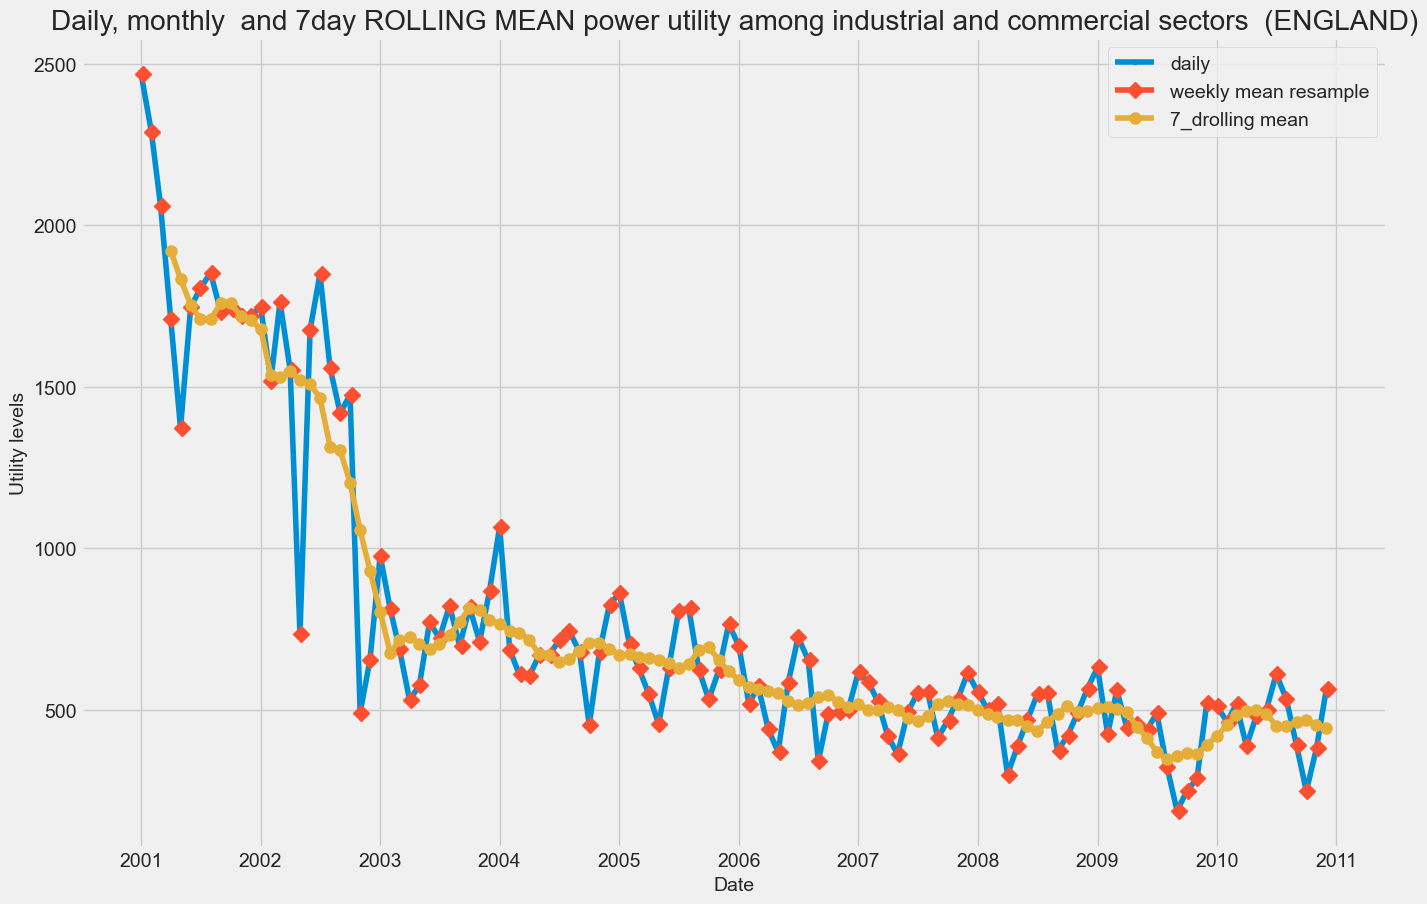

In [22]:
# plot style
style.use("fivethirtyeight")
#  create new rolling data
dfrolling_ENG= df[cols_ENG].rolling(7, center = True).mean()
# create timeline
start , end= "2001", "2010"
# plot rolling data
fig, ax = plt.subplots(figsize = (15,10))
ax.plot(df.loc[start:end ,"New England : electric utility"], marker=".",linestyle="-", label="daily")
ax.plot(df_weekly_avg_ENG.loc[start : end,"New England : electric utility"],marker="D",markersize=8 ,linestyle="-", label="weekly mean resample")
ax.plot(dfrolling_ENG.loc[start : end,"New England : electric utility"],marker="o",markersize=8 ,linestyle="-", label="7_drolling mean")
ax.set_ylabel("Utility levels")
ax.set_xlabel("Date")
ax.set_title("Daily, monthly  and 7day ROLLING MEAN power utility among industrial and commercial sectors  (ENGLAND)")
ax.legend()
plt.show()

#  TRENDS ( rolling mean()) 30 days

# USA

#### USA 30 day Rolling mean comparision between daily, and 7day_rolling

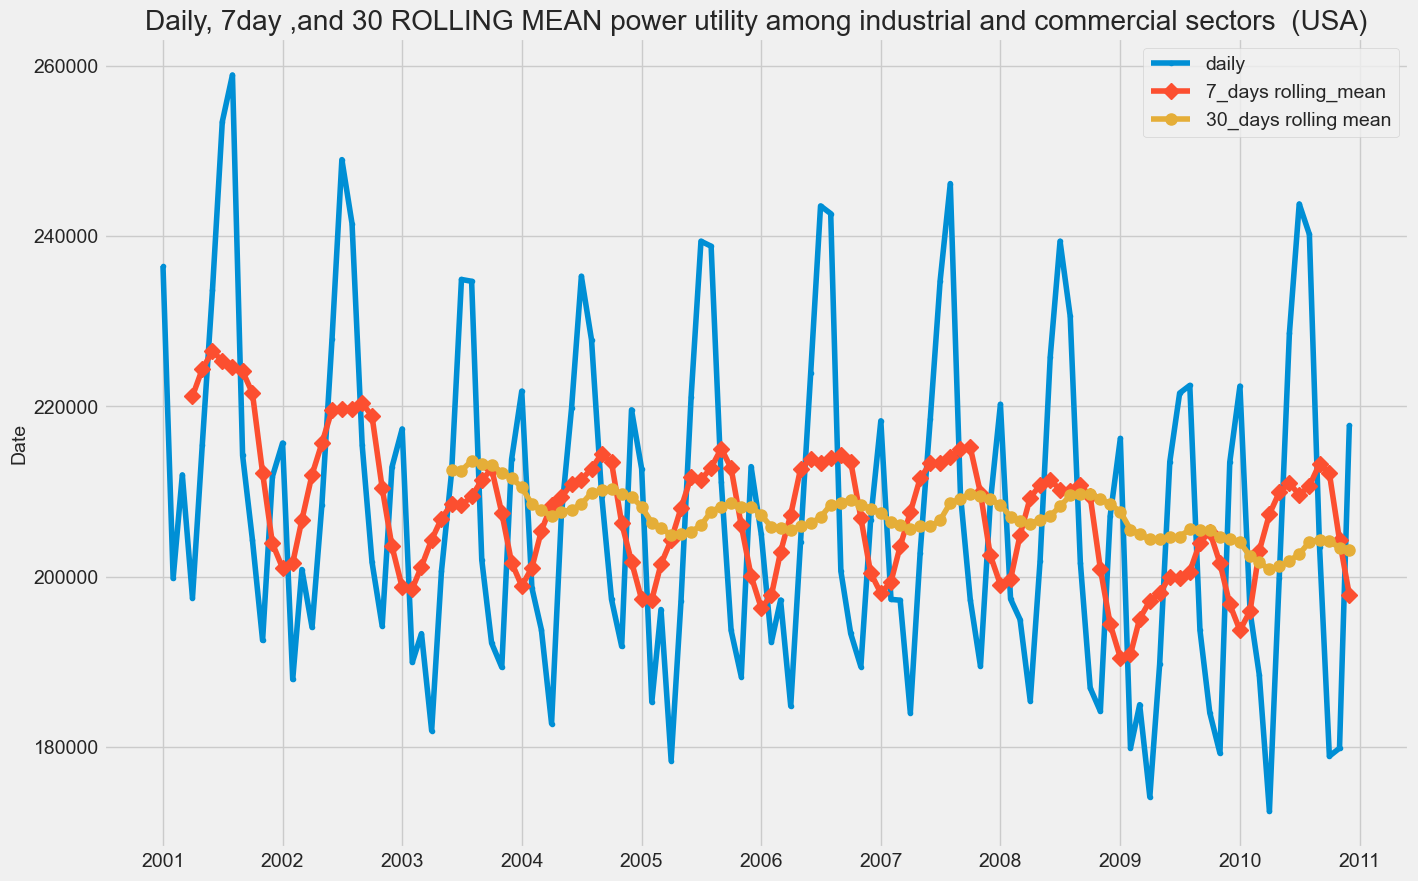

In [23]:
# plot style
style.use("fivethirtyeight")
#  create new rolling data
dfrollmd_mo_USA= df[cols_USA].rolling(window= 30).mean()
# create timeline
start , end= "2001", "2010"
# plot rolling data
fig, ax = plt.subplots(figsize = (15,10))
ax.plot(df.loc[start:end ,"United States : electric utility"], marker=".",linestyle="-", label="daily")
ax.plot(dfrolling_USA.loc[start : end,"United States : electric utility"],marker="D",markersize=8 ,linestyle="-", label="7_days rolling_mean")
ax.plot(dfrollmd_mo_USA.loc[start : end,"United States : electric utility"],marker="o",markersize=8 ,linestyle="-", label="30_days rolling mean")
ax.set_ylabel("utility levels")
ax.set_ylabel("Date")
ax.set_title("Daily, 7day ,and 30 ROLLING MEAN power utility among industrial and commercial sectors  (USA)")
ax.legend()
plt.show()

# ENGLAND

#### ENGLAND 30 day Rolling mean comparision between daily, and 7_day rolling mean

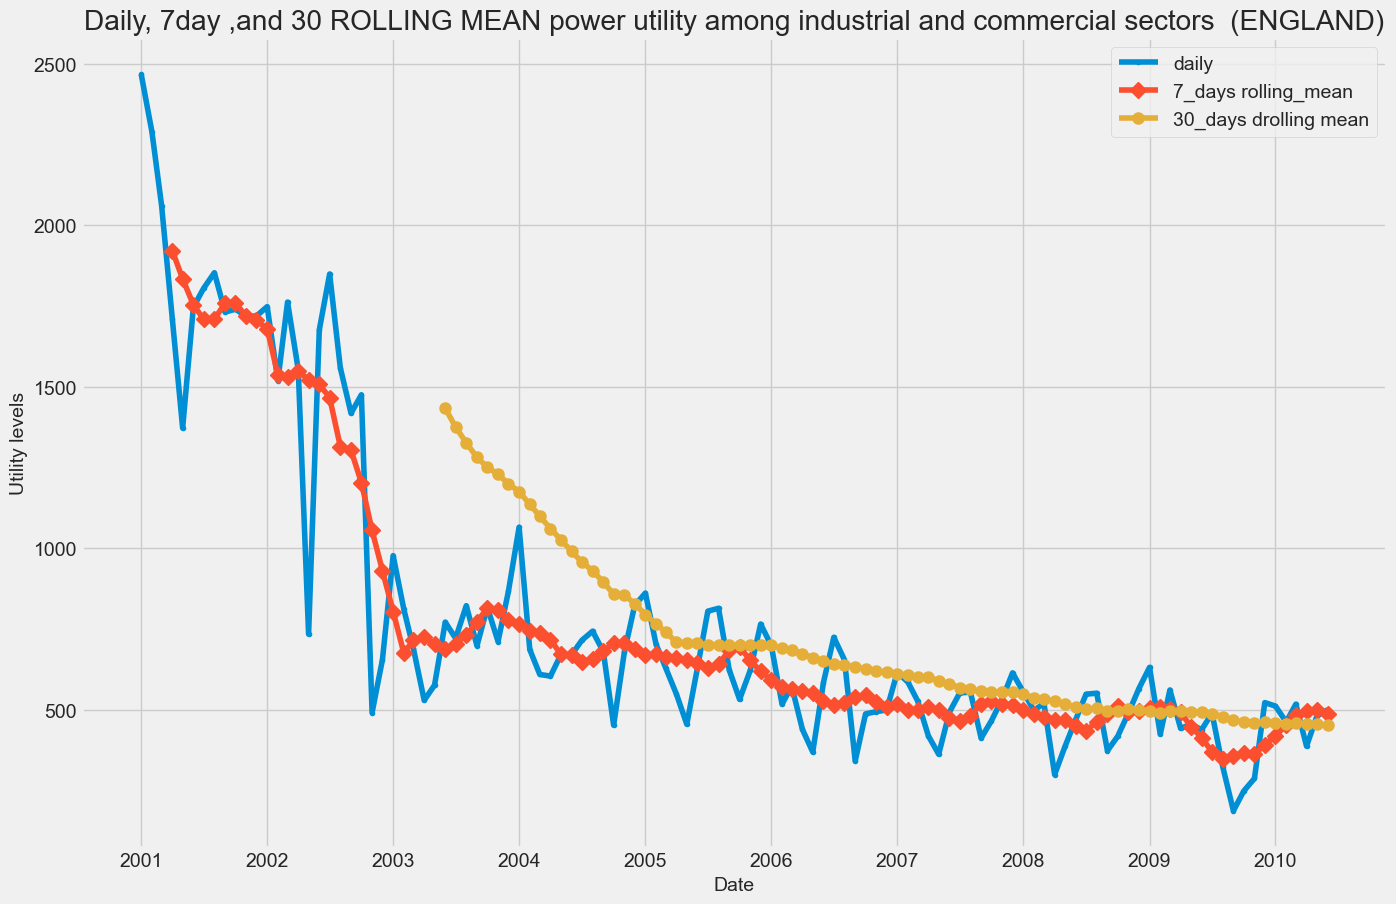

In [24]:
# plot style
style.use('fivethirtyeight')
#  create new rolling data
dfrollmd_mo_ENG= df[cols_ENG].rolling(window=30).mean()
# create timeline
start , end= "2001", "2010-06"
# plot rolling data
fig, ax = plt.subplots(figsize = (15,10))
ax.plot(df.loc[start:end ,"New England : electric utility"], marker=".",linestyle="-", label="daily")
ax.plot(dfrolling_ENG.loc[start : end,"New England : electric utility"],marker="D",markersize=8 ,linestyle="-", label="7_days rolling_mean")
ax.plot(dfrollmd_mo_ENG.loc[start : end,"New England : electric utility"],marker="o",markersize=8 ,linestyle="-", label="30_days drolling mean")
ax.set_ylabel("Utility levels")
ax.set_title("Daily, 7day ,and 30 ROLLING MEAN power utility among industrial and commercial sectors  (ENGLAND)")
ax.set_xlabel("Date")
ax.legend()
plt.show()

In [25]:
df.head(1)

United States : all sectors  United States : electric utility  \
Date                                                                        
2001-01-01                       332493                            236467   

            United States : independent power producers  \
Date                                                      
2001-01-01                                        82269   

            United States : all commercial  United States : all industrial  \
Date                                                                         
2001-01-01                             629                           13128   

            New England : all sectors  New England : electric utility  \
Date                                                                    
2001-01-01                      10005                            2467   

            New England : independent power producers  \
Date                                                    
2001-01-01                                       6959   

            New England : all commercial  New England : all industrial  \
Date                                                                     
2001-01-01                            68                           510   

            days_of_the week  weeks of the year  months of the year  year  
Date                                                                       
2001-01-01                 0                  1                   1  2001

In [26]:
# rename column names of dataset
df_new=df.rename(columns={df.columns[0] : "United_States_all_sectors" , df.columns[1] : "United_States_electric_utility" , df.columns[2] : "United_States_independent_power_producers" ,
                  df.columns[3] : "United_States_all_commercial" ,df.columns[4] :"United_States_all_industrial",
                  df.columns[5]: "New_England_all_sectors",df.columns[6] :"New_England_electric_utility",
                  df.columns[7] :"New_England_electric_utility",df.columns[8] :"New_England_independent_power_producers",
                  df.columns[9] :"New_England_all_commercial",df.columns[10] : "New_England-all_industrial"})

In [27]:
df_new.head(1)

United_States_all_sectors  United_States_electric_utility  \
Date                                                                    
2001-01-01                     332493                          236467   

            United_States_independent_power_producers  \
Date                                                    
2001-01-01                                      82269   

            United_States_all_commercial  United_States_all_industrial  \
Date                                                                     
2001-01-01                           629                         13128   

            New_England_all_sectors  New_England_electric_utility  \
Date                                                                
2001-01-01                    10005                          2467   

            New_England_electric_utility  \
Date                                       
2001-01-01                          6959   

            New_England_independent_power_producers  \
Date                                                  
2001-01-01                                       68   

            New_England_all_commercial  New_England-all_industrial  \
Date                                                                 
2001-01-01                         510                           0   

            weeks of the year  months of the year  year  
Date                                                     
2001-01-01                  1                   1  2001

# Decomposition (U.S.A)



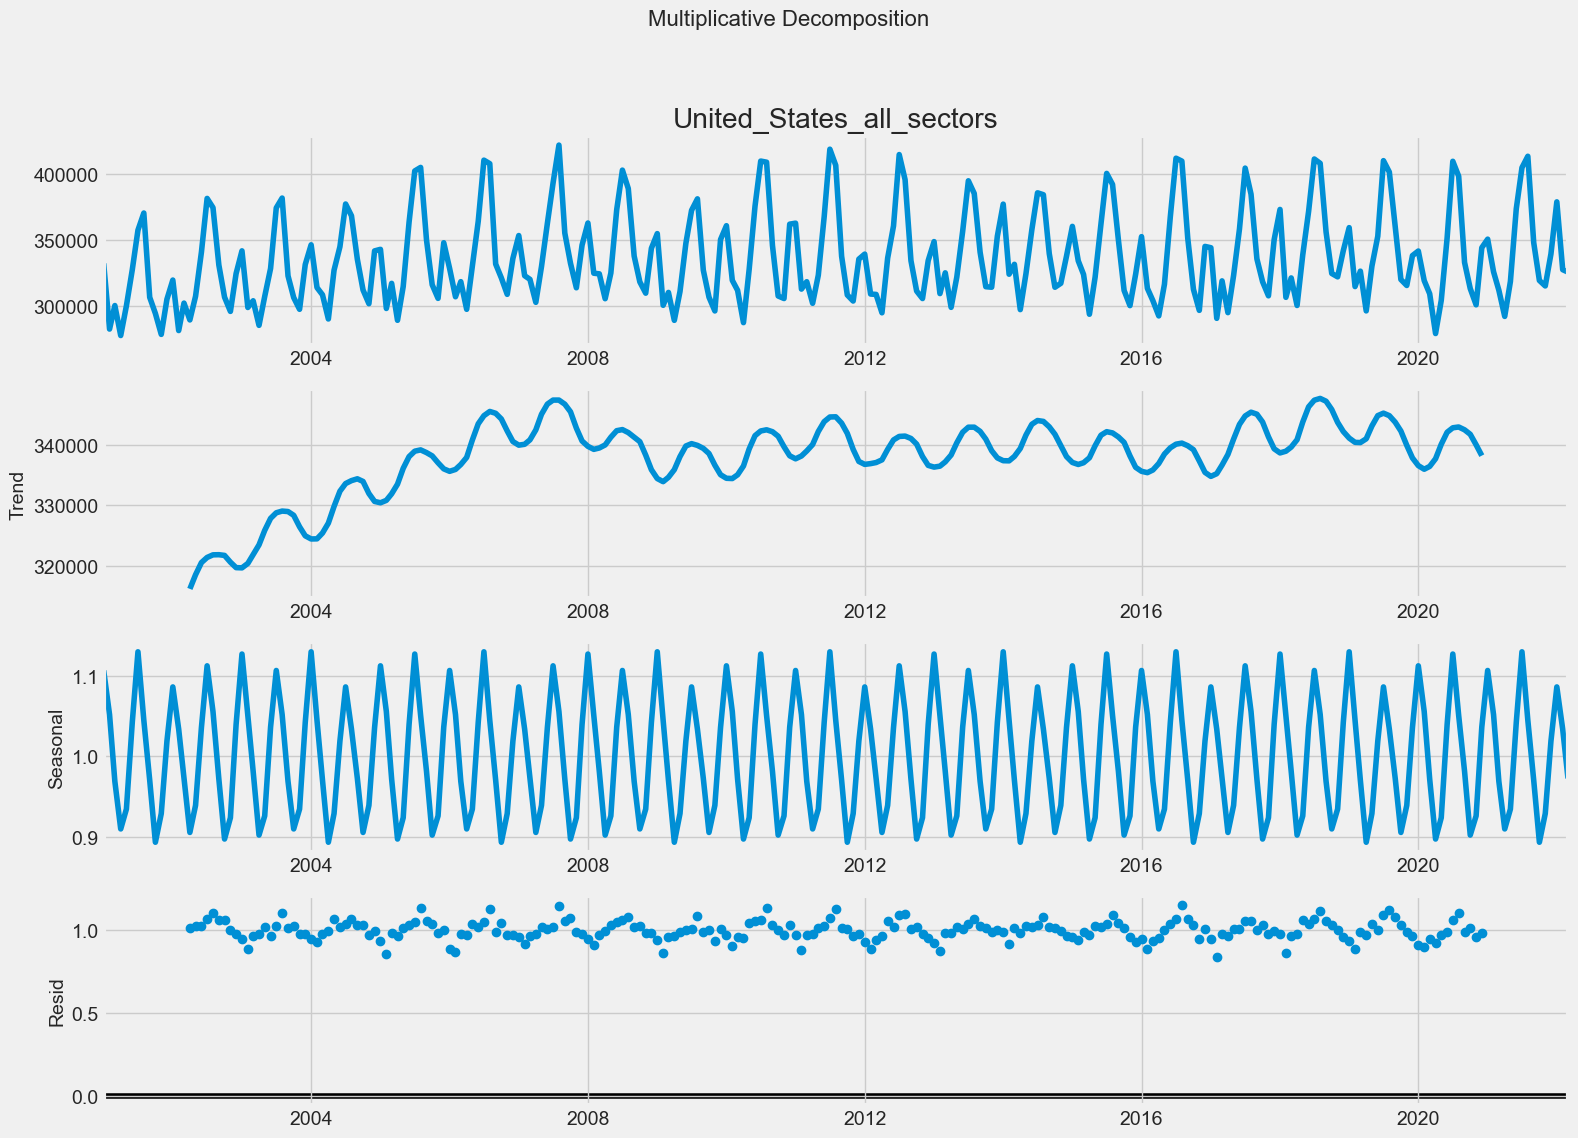

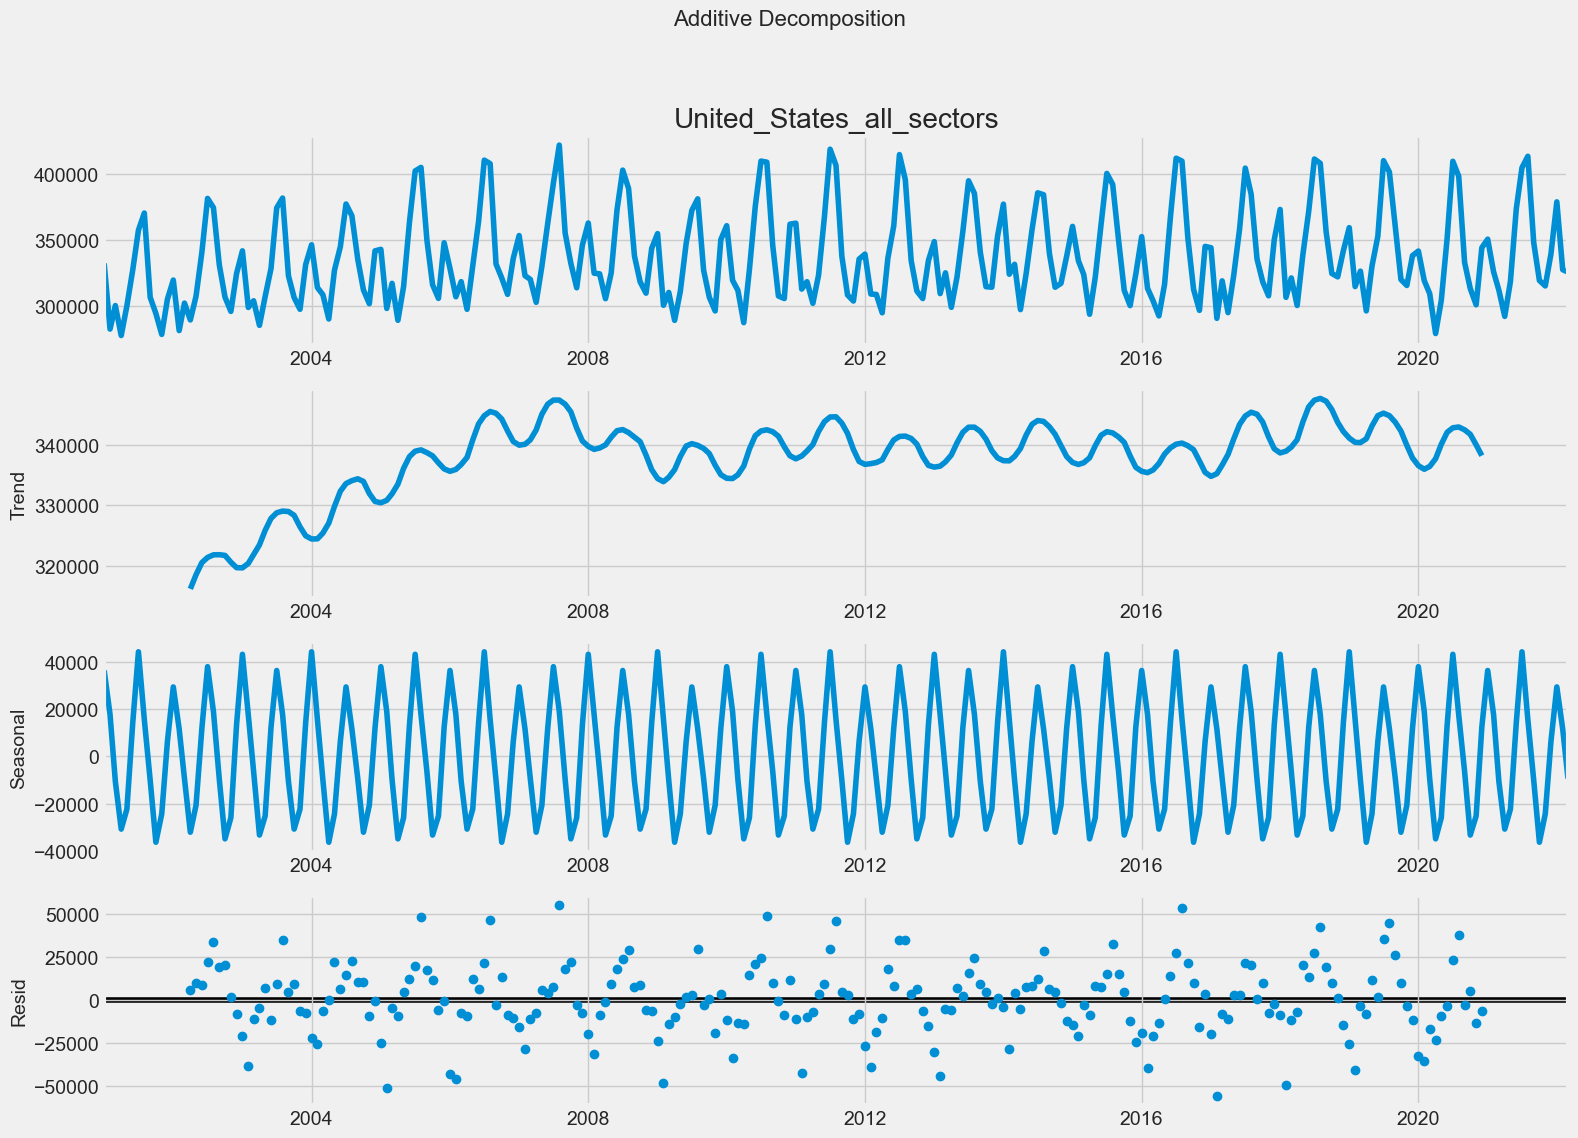

In [28]:
style.use("fivethirtyeight")
from statsmodels.tsa.seasonal import seasonal_decompose



# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df_new["United_States_all_sectors"], model="multiplicative", period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df_new["United_States_all_sectors"], model="additive", period=30)

# Plot
plt.rcParams.update({"figure.figsize": (16,12)})
multiplicative_decomposition.plot().suptitle("Multiplicative Decomposition", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle("Additive Decomposition", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Decomposition (ENGLAND)

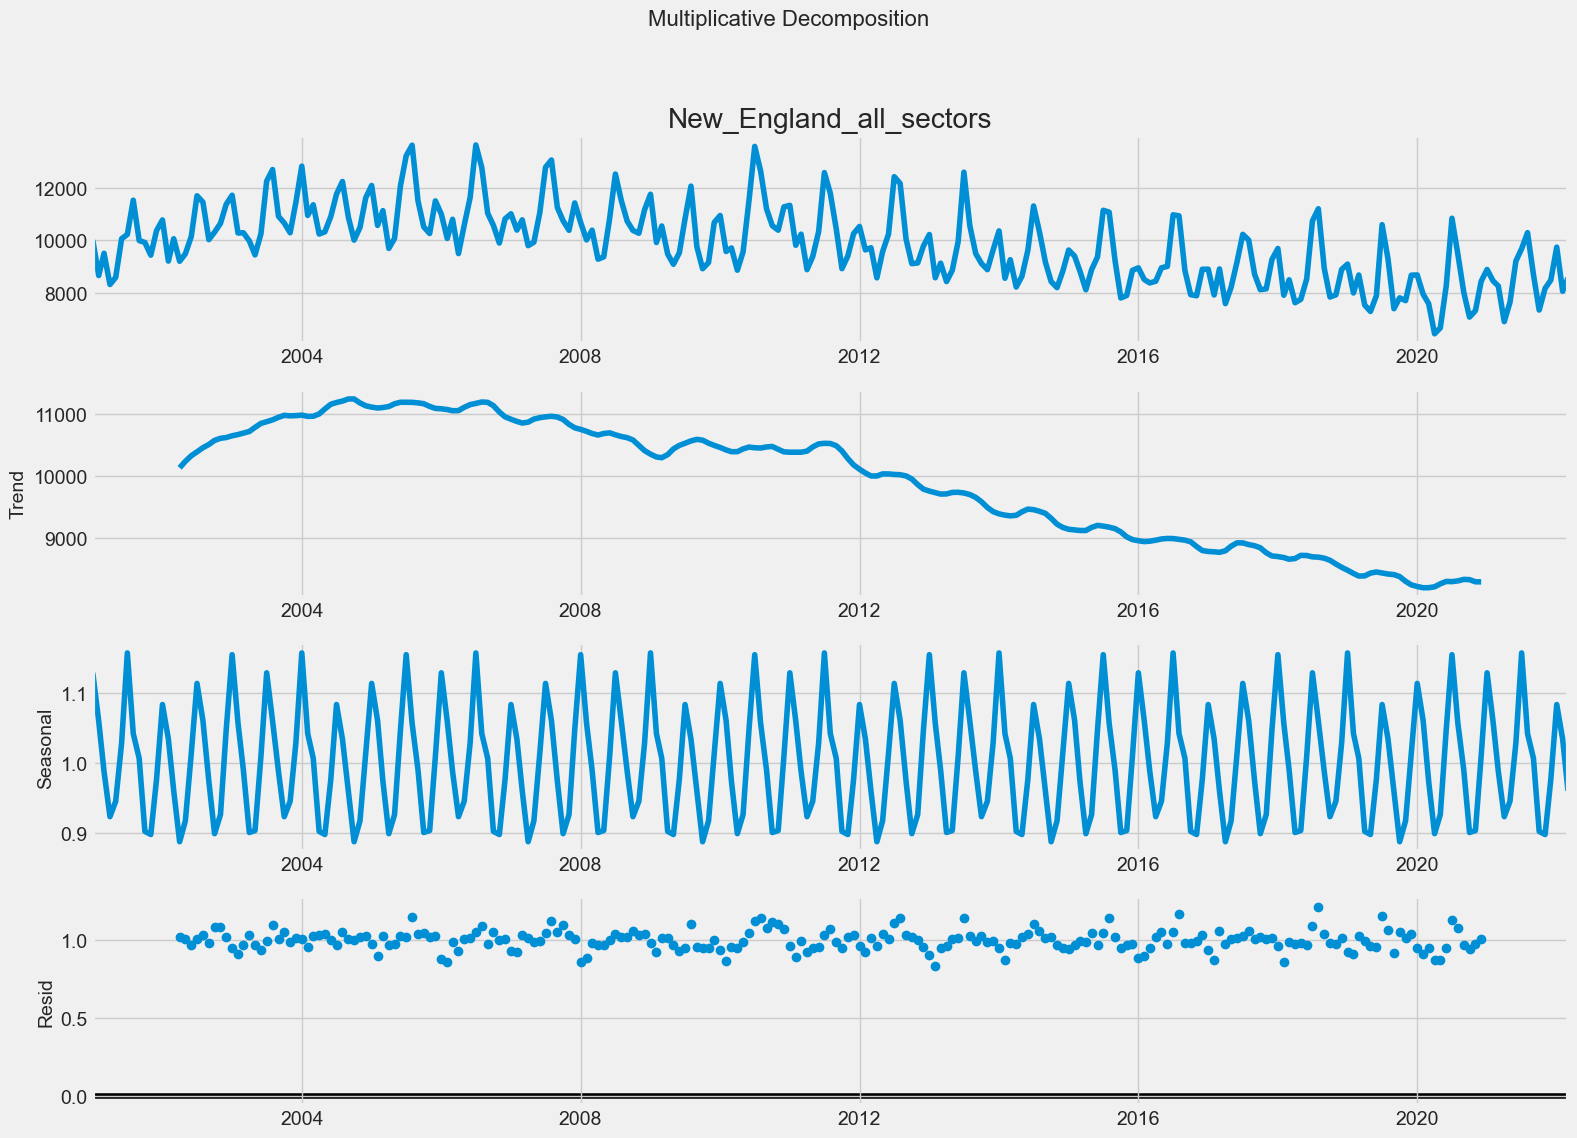

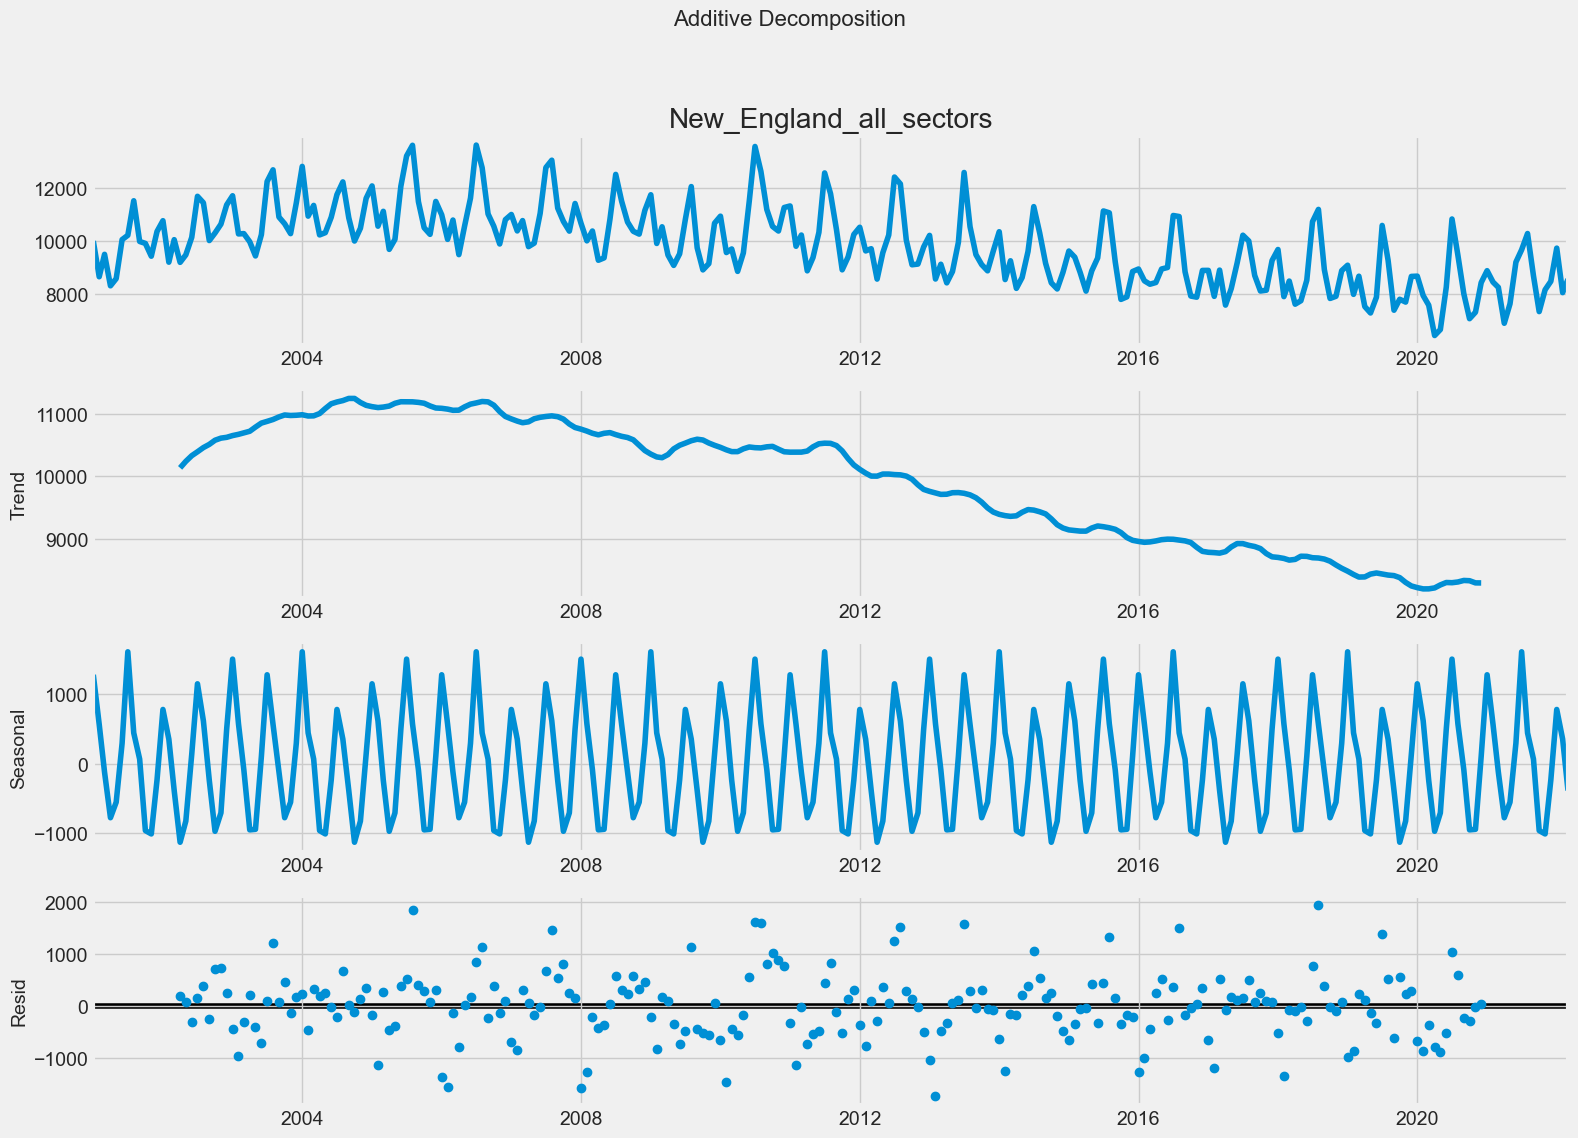

In [29]:
style.use("fivethirtyeight")
from statsmodels.tsa.seasonal import seasonal_decompose



# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df_new["New_England_all_sectors"], model="multiplicative", period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df_new["New_England_all_sectors"], model="additive", period=30)

# Plot
plt.rcParams.update({"figure.figsize": (16,12)})
multiplicative_decomposition.plot().suptitle("Multiplicative Decomposition", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle("Additive Decomposition", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [30]:
df_new.head(1)

United_States_all_sectors  United_States_electric_utility  \
Date                                                                    
2001-01-01                     332493                          236467   

            United_States_independent_power_producers  \
Date                                                    
2001-01-01                                      82269   

            United_States_all_commercial  United_States_all_industrial  \
Date                                                                     
2001-01-01                           629                         13128   

            New_England_all_sectors  New_England_electric_utility  \
Date                                                                
2001-01-01                    10005                          2467   

            New_England_electric_utility  \
Date                                       
2001-01-01                          6959   

            New_England_independent_power_producers  \
Date                                                  
2001-01-01                                       68   

            New_England_all_commercial  New_England-all_industrial  \
Date                                                                 
2001-01-01                         510                           0   

            weeks of the year  months of the year  year  
Date                                                     
2001-01-01                  1                   1  2001

# Autocorrelation (USA)

In [31]:
autocorrelation_lag1=df_new["United_States_all_sectors"].autocorr(lag=1)
print("One MOnth Lag :", autocorrelation_lag1)

autocorrelation_lag2=df_new["United_States_all_sectors"].autocorr(lag=2)
print("two MOnth Lag :", autocorrelation_lag2)

One MOnth Lag : 0.5731447691626406
two MOnth Lag : -0.027734834619947163


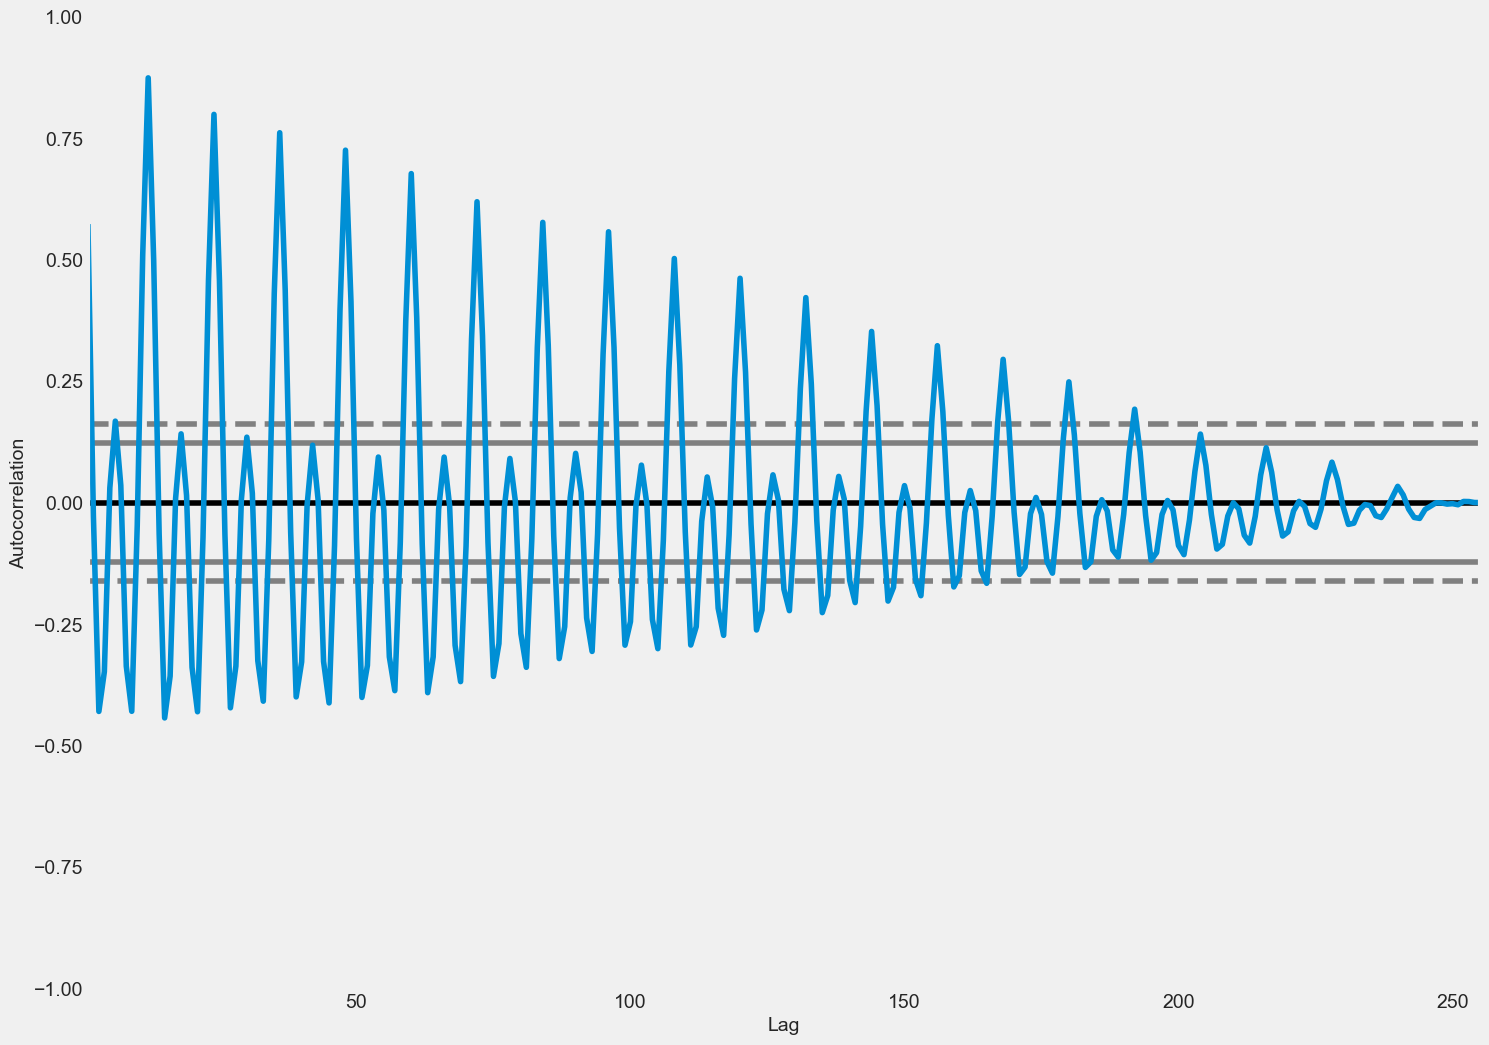

In [32]:
style.use("fivethirtyeight")
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df_new["United_States_all_sectors"])
plt.show()

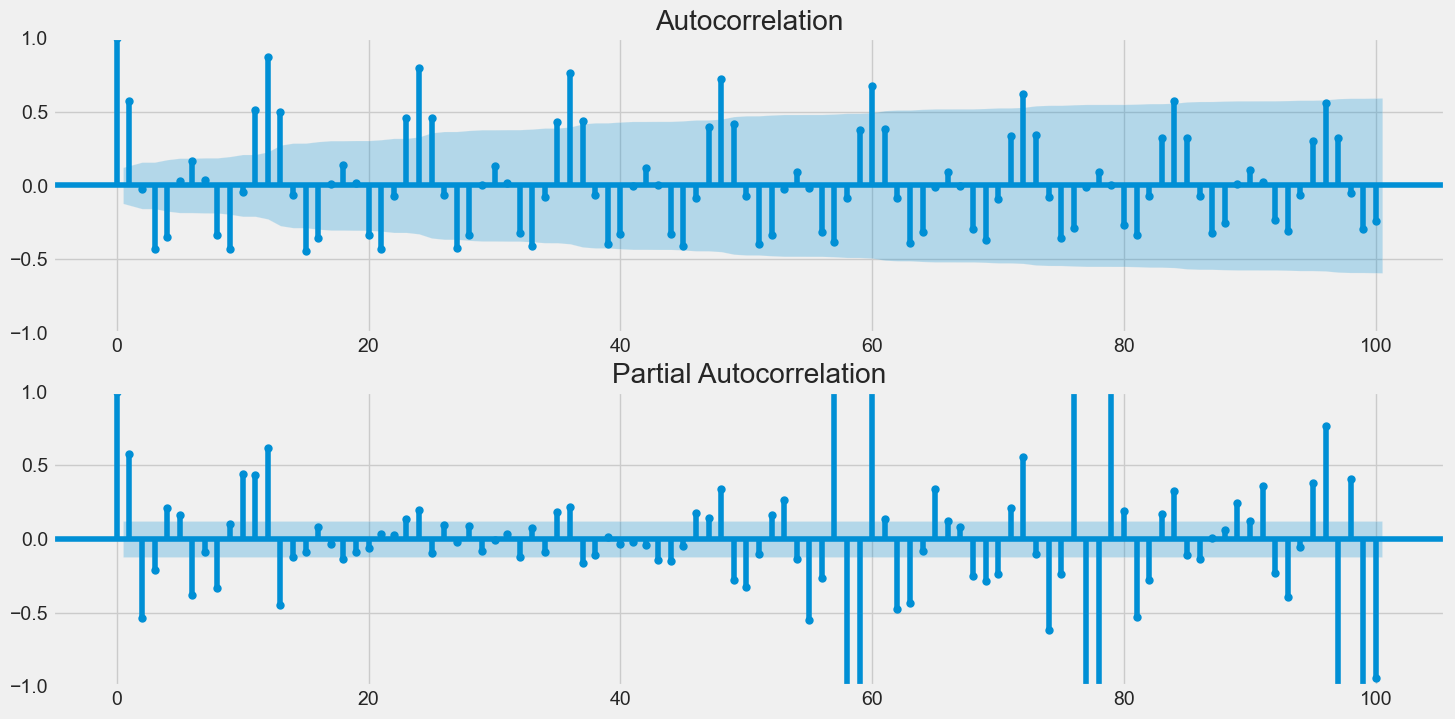

In [33]:
style.use("fivethirtyeight")
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(df_new["United_States_all_sectors"], lags=100, ax=ax[0])
plot_pacf(df_new["United_States_all_sectors"], lags=100, ax=ax[1])

plt.show()

In [34]:
df_new.head(1)

United_States_all_sectors  United_States_electric_utility  \
Date                                                                    
2001-01-01                     332493                          236467   

            United_States_independent_power_producers  \
Date                                                    
2001-01-01                                      82269   

            United_States_all_commercial  United_States_all_industrial  \
Date                                                                     
2001-01-01                           629                         13128   

            New_England_all_sectors  New_England_electric_utility  \
Date                                                                
2001-01-01                    10005                          2467   

            New_England_electric_utility  \
Date                                       
2001-01-01                          6959   

            New_England_independent_power_producers  \
Date                                                  
2001-01-01                                       68   

            New_England_all_commercial  New_England-all_industrial  \
Date                                                                 
2001-01-01                         510                           0   

            weeks of the year  months of the year  year  
Date                                                     
2001-01-01                  1                   1  2001

# Autocorrelation (England)

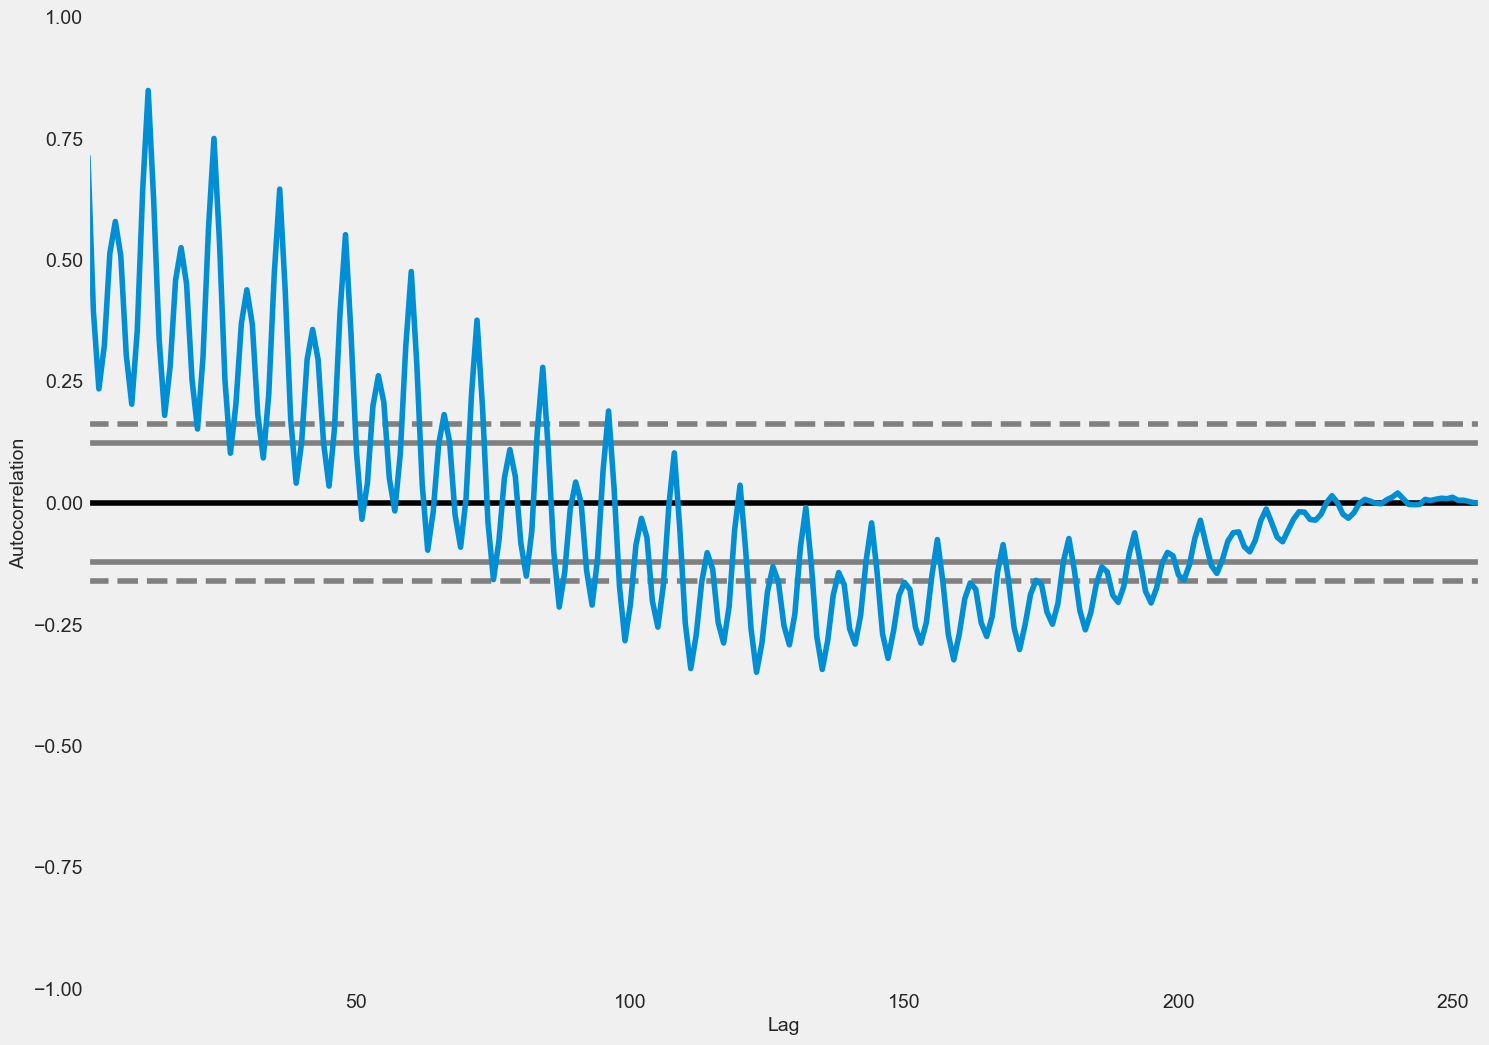

In [35]:
style.use("fivethirtyeight")
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df_new["New_England_all_sectors"])
plt.show()

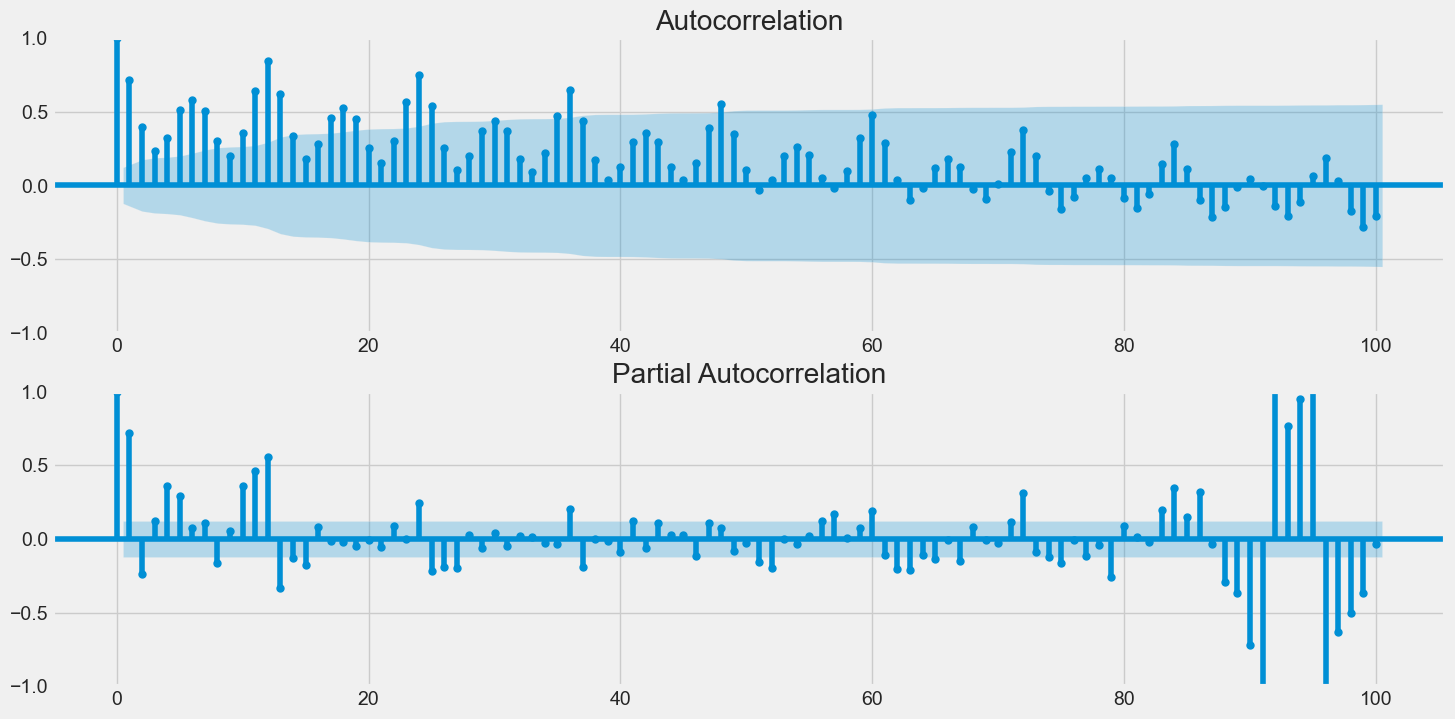

In [36]:
style.use("fivethirtyeight")
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(df_new["New_England_all_sectors"], lags=100, ax=ax[0])
plot_pacf(df_new["New_England_all_sectors"], lags=100, ax=ax[1])

plt.show()

# Differencing

- Differencing is used to make the difference in values of a specified interval. By default, it’s one, we can specify different values for plots. It is the most popular method to remove trends in the data.

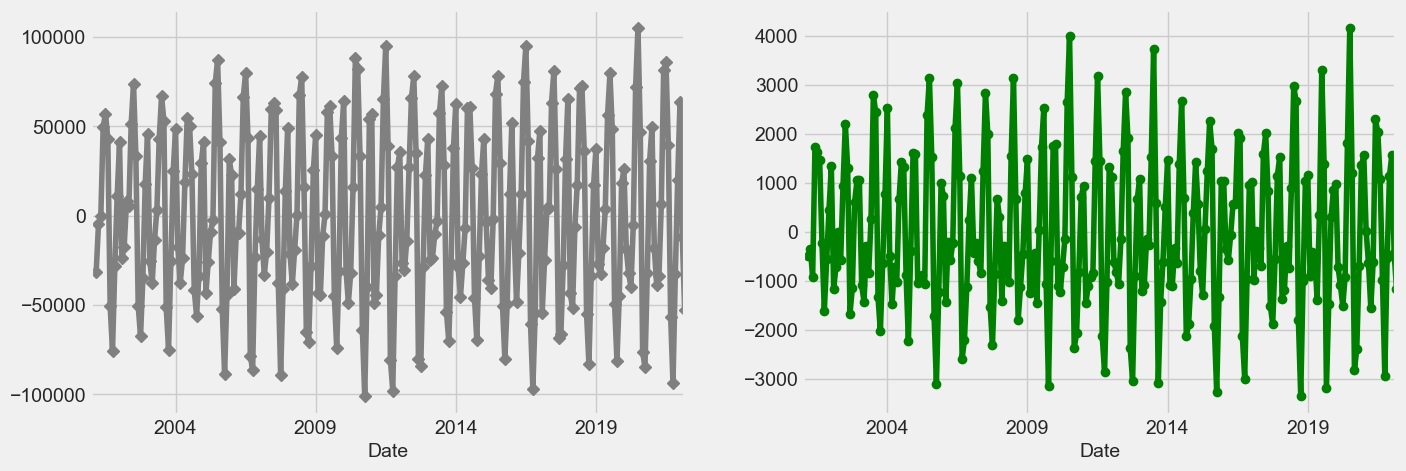

In [37]:
# plot suplots
style.use("fivethirtyeight")
# plot subplot
f,ax = plt.subplots (1,2,figsize = (15 ,5))
df_new.United_States_all_sectors.diff(2).plot(ax = ax [0],marker="D",color="gray" )
df_new.New_England_all_sectors.diff(2).plot(ax = ax [1],marker="o",color="green")

plt.show ()

# shift

- The shift function can be used to shift the data before or after a  specified time interval. We can specify the time, which will shift the data by one day by default. That means we will get the previous day’s data. It is helpful to see the previous day’s data and today’s data simultaneously side by side.

- The code, .div() function helps to fill up the missing data values. Actually, div() means division. If we take df. div(6) it will divide each element in df by 6. We do this to avoid the null or missing values that are created by the ‘shift()’ operation. 

- Here, we have taken .div(df.Close.shift()), it will divide each value of df to df.Close.shift() to remove null values.

In [38]:
# create new column for shift
df_new["USA Shift"] = df_new.United_States_all_sectors.div(df_new.United_States_all_sectors.shift())
df_new["England Shift"] = df_new.New_England_all_sectors.div(df_new.New_England_all_sectors.shift())

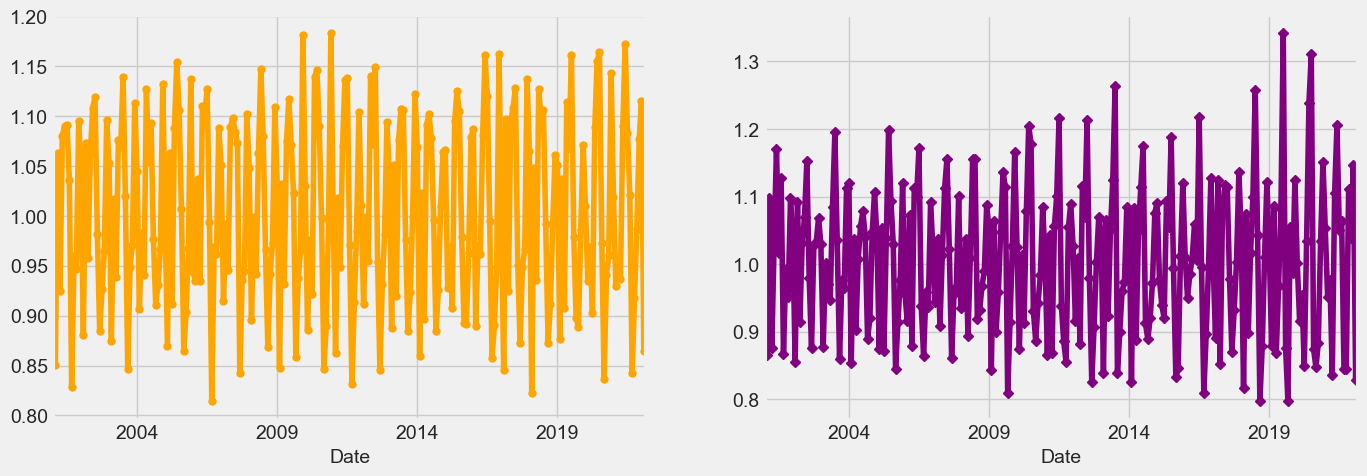

In [39]:
style.use("fivethirtyeight")
# plot shift
f,ax = plt.subplots (1,2,figsize = (15 ,5))
df_new["USA Shift"].plot(ax = ax [0],marker="o", markersize= 5,color="orange" )
df_new["England Shift"].plot(ax = ax [1],marker="D",markersize= 5,color="purple")

plt.show ()

# stationarity

- For forecasting purposes, it is desirable for a time series to exhibit stationarity. In a stationary time series, the mean  and standard deviation remain constant over time. Stationarity is important because it allows us to make reliable predictions based on the assumption that the future behavior of the time series will be similar to its past behavior.



In [40]:
df_usa_all_sectors=df_new.United_States_all_sectors

In [41]:
dfrolling_USA_sectors_mean= df_new.United_States_all_sectors.rolling(7, center = True).mean()
dfrolling_USA_sectors_std= df_new.United_States_all_sectors.rolling(7, center = True).std()

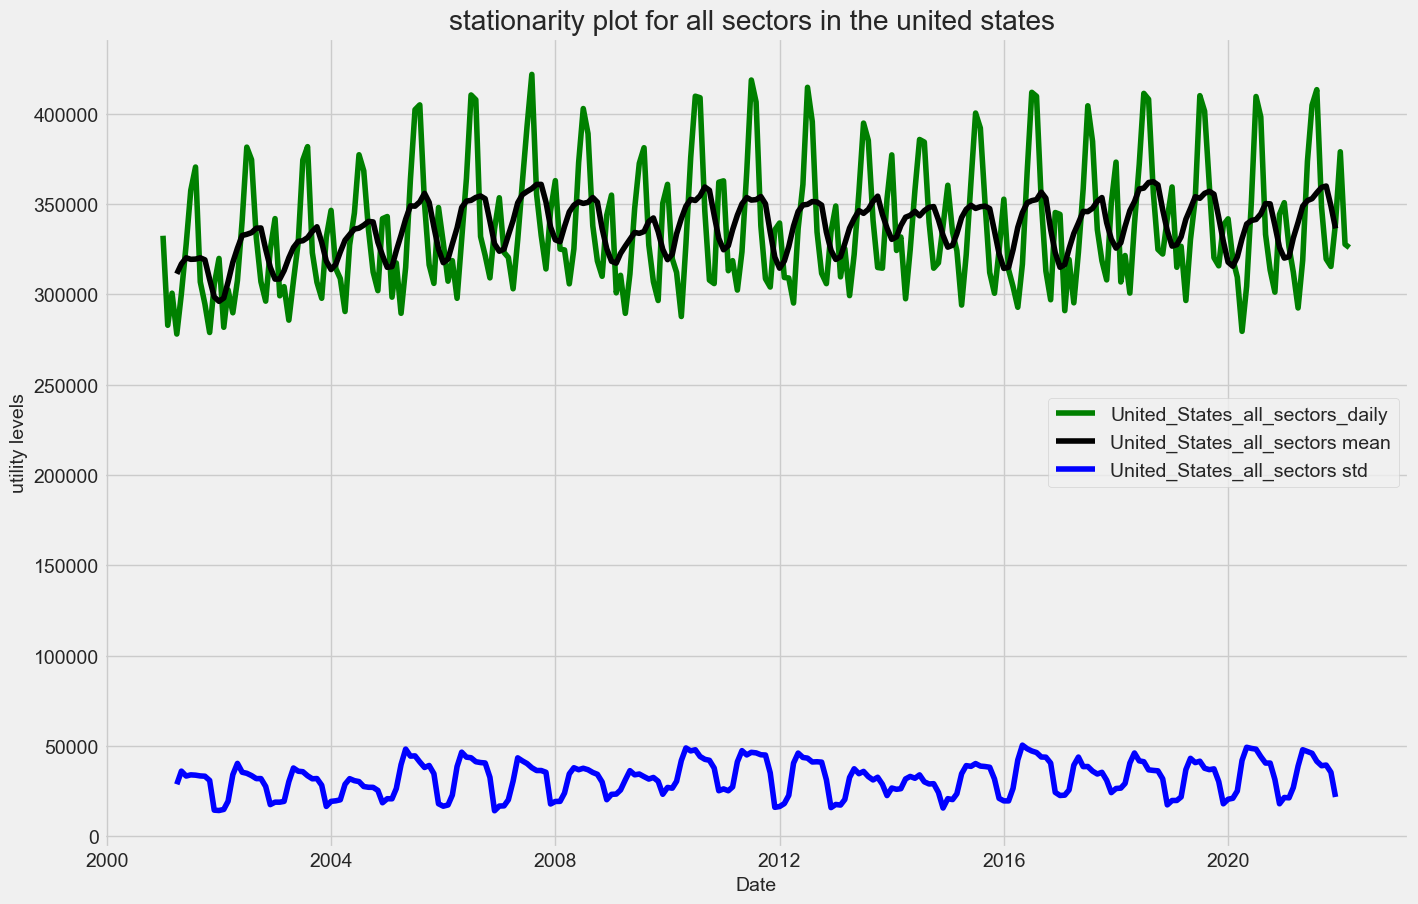

In [43]:
fig, ax = plt.subplots(figsize = (15,10))
ax.plot(df_usa_all_sectors,color="green" ,label="United_States_all_sectors_daily")
ax.plot(dfrolling_USA_sectors_mean,color ="black" ,label="United_States_all_sectors mean")
ax.plot(dfrolling_USA_sectors_std ,color= "blue",label= "United_States_all_sectors std")
ax.set_title("stationarity plot for all sectors in the united states ")
ax.set_ylabel("utility levels")
ax.set_xlabel("Date")
plt.legend(loc= "best")
plt.show()

- There are several statistical tests available to determine the stationarity of a time series. Here we are going to use Augmented Dickey-Fuller (ADF) Test. The ADF tests the null hypothesis that a unit root is present in the time series (indicating non-stationarity) 

-  If the p-value obtained from the ADF test is below a chosen significance level (e.g., 0.05), we can reject the null hypothesis and conclude that the series is stationary.

In [44]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df_new.United_States_all_sectors)
adf_statistic= result[0]
p_value=result[1]
critical_values= result[4]

print("ADF Statistic:" , adf_statistic)
print("p_value :",p_value)
print ("Critical Values:")
for key, value in critical_values.items():
    print(f"{key}:{value}")

ADF Statistic: -3.5613572783625376
p_value : 0.006544248574970173
Critical Values:
1%:-3.4578942529658563
5%:-2.8736593200231484
10%:-2.573228767361111


# TIMESERIES FORCASTING 📉

In [45]:
# import necessary libraries
from prophet import Prophet

In [46]:
import prophet

###  USA power utility forecasting for  all sectors

In [47]:
#pip install fbprophet

In [48]:
#pip install prophet

In [49]:
# create a data for forcasting
df_model= df_new.reset_index()

In [50]:
df_model.head(1) #  first roll forcast data 

Date  United_States_all_sectors  United_States_electric_utility  \
0 2001-01-01                     332493                          236467   

   United_States_independent_power_producers  United_States_all_commercial  \
0                                      82269                           629   

   United_States_all_industrial  New_England_all_sectors  \
0                         13128                    10005   

   New_England_electric_utility  New_England_electric_utility  \
0                          2467                          6959   

   New_England_independent_power_producers  New_England_all_commercial  \
0                                       68                         510   

   New_England-all_industrial  weeks of the year  months of the year  year  \
0                           0                  1                   1  2001   

   USA Shift  England Shift  
0        NaN            NaN

In [51]:
# creat data for data with only data  and target variable
df = pd.DataFrame()
df_model["ds"] = pd.to_datetime(df_model["Date"])
df_model["y"] = df_model["United_States_all_sectors"]


In [52]:
# model forcasting for 10 years
m = Prophet()
m.fit(df_model)
future = m.make_future_dataframe(periods=12 * 10,
                                 freq="M")

16:26:30 - cmdstanpy - INFO - Chain [1] start processing
16:26:31 - cmdstanpy - INFO - Chain [1] done processing


In [53]:
# creating future forcasting
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower",
          "yhat_upper", "trend",
          "trend_lower", "trend_upper"]].tail()

ds           yhat     yhat_lower     yhat_upper          trend  \
370 2031-10-31  319848.045469  304542.212989  332754.111212  349091.118320   
371 2031-11-30  333293.646552  318894.047422  347088.086902  349133.246912   
372 2031-12-31  356629.915191  341123.620620  371418.602385  349176.779791   
373 2032-01-31  336798.532061  322623.024687  351254.637924  349220.312670   
374 2032-02-29  329335.777514  315534.434348  342112.432253  349261.036976   

       trend_lower    trend_upper  
370  340719.323994  356835.169535  
371  340641.858040  357003.542424  
372  340583.332316  357086.542439  
373  340547.120929  357264.662491  
374  340408.163573  357396.760643

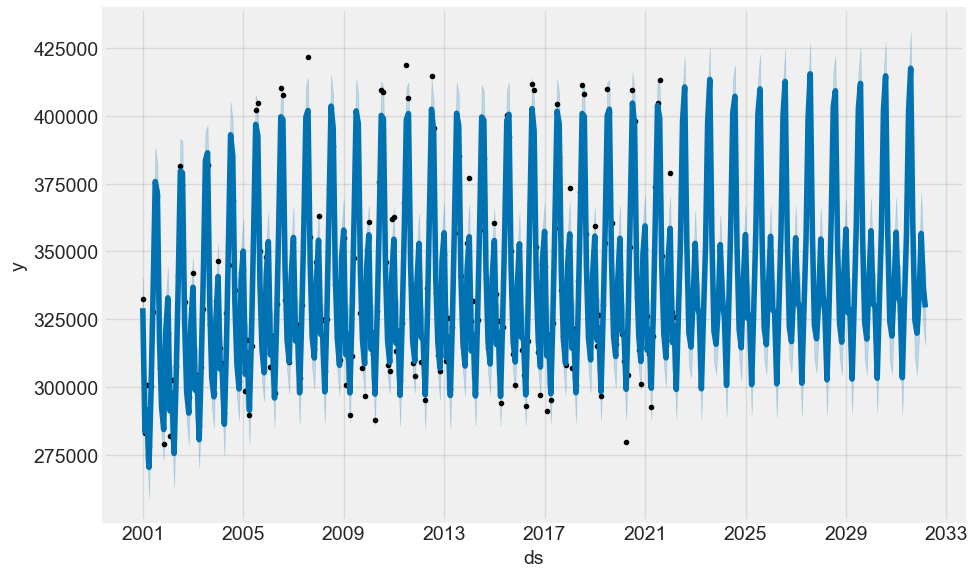

In [54]:
# plot style
style.use("fivethirtyeight")
# show plot
fig1 = m.plot(forecast)

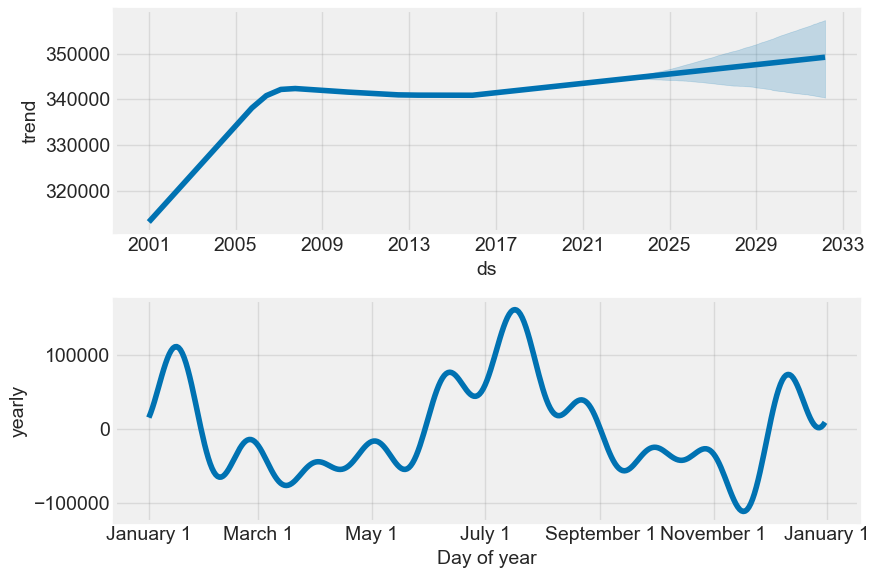

In [55]:
# plot style 
style.use("fivethirtyeight")
fig2 = m.plot_components(forecast)
# show plot
fig2=plt.show()
fig2

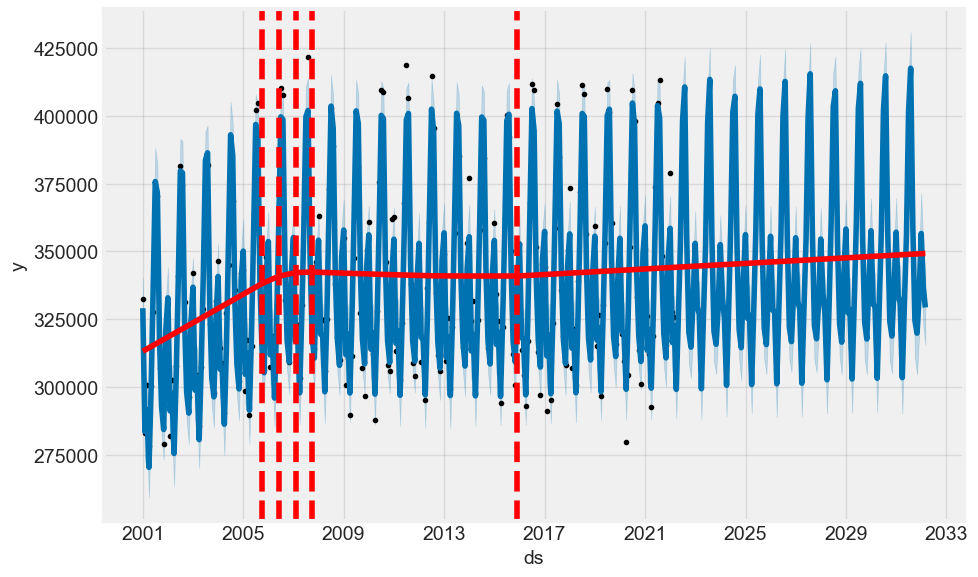

In [56]:
# plot style
style.use("fivethirtyeight")
# show changes
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),
                             m, forecast)
plt.show()

# TIMESERIES PREDICTION 📉

#### Difference between forcasting and prediction

- A forecast can be said  to be a calculation or an estimation which uses data from previous events, together with recent trends to come up a future outcome. A prediction is an actual act of indicating that something will happen in the future with or without prior information. inorder words forcasting **shows** the future while prediction **tells** the future

In [61]:
# create new dataframe for predections
df_model_2= df_new.reset_index()

In [62]:
# new data for predictive model
df_model_2.head(1) 

Date  United_States_all_sectors  United_States_electric_utility  \
0 2001-01-01                     332493                          236467   

   United_States_independent_power_producers  United_States_all_commercial  \
0                                      82269                           629   

   United_States_all_industrial  New_England_all_sectors  \
0                         13128                    10005   

   New_England_electric_utility  New_England_electric_utility  \
0                          2467                          6959   

   New_England_independent_power_producers  New_England_all_commercial  \
0                                       68                         510   

   New_England-all_industrial  weeks of the year  months of the year  year  \
0                           0                  1                   1  2001   

   USA Shift  England Shift  
0        NaN            NaN

In [64]:
# Getting the test and train size of the data
train_size = int(0.99 * len(df_model_2))
test_size = len(df_model_2) - train_size
# Train models
Train_df_model_2 = df_model_2[["Date", "United_States_electric_utility"]].copy()
Train_df_model_2.columns = ["ds", "y"]
train = Train_df_model_2.iloc[:train_size, :]
x_train, y_train = pd.DataFrame(Train_df_model_2.iloc[:train_size, 0]), pd.DataFrame(Train_df_model_2.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(Train_df_model_2.iloc[train_size:, 0]), pd.DataFrame(Train_df_model_2.iloc[train_size:, 1])
# length of model
print(len(train), len(x_valid))

252 3


In [73]:
# viewing training data
train

ds       y
0   2001-01-01  236467
1   2001-02-01  199802
2   2001-03-01  211942
3   2001-04-01  197499
4   2001-05-01  215508
..         ...     ...
247 2021-08-01  229150
248 2021-09-01  186742
249 2021-10-01  165575
250 2021-11-01  163203
251 2021-12-01  178473

[252 rows x 2 columns]

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error
import math

from prophet import Prophet


# Train the model
model = Prophet()
model.fit(train)

x_valid = model.make_future_dataframe(periods=test_size, freq="M")

# Predict on valid set
y_pred = model.predict(x_valid)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred.tail(test_size)["yhat"])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred.tail(test_size)["yhat"]))
score_mape = mean_absolute_percentage_error(y_valid, y_pred.tail(test_size)["yhat"])
print("MAE is {}".format(score_mae))
print("RMSE: {}".format(score_rmse))
print("MAPE is {}".format(score_mape))

16:53:01 - cmdstanpy - INFO - Chain [1] start processing
16:53:01 - cmdstanpy - INFO - Chain [1] done processing


MAE is 8666.993245216241
RMSE: 10759.959643823686
MAPE is 0.04558199198660601


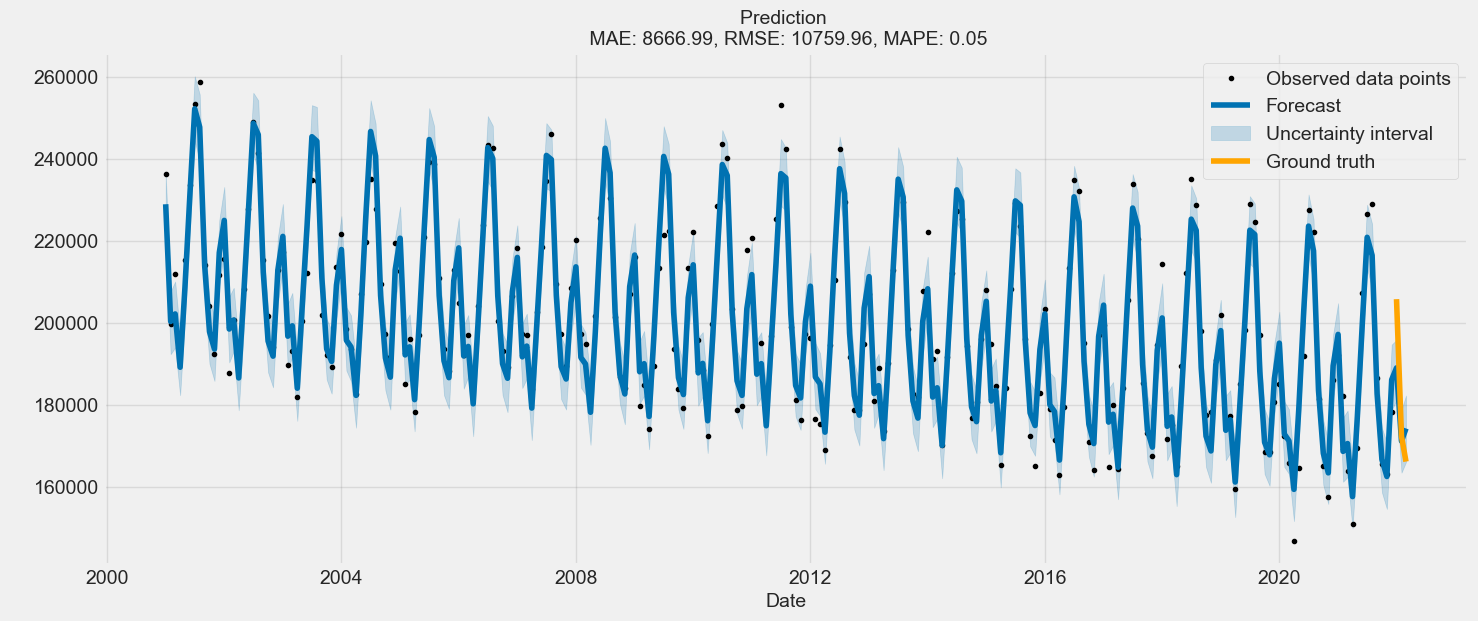

In [72]:
style.use("fivethirtyeight")
# plot prediction models
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model.plot(y_pred, ax=ax)
sns.lineplot(x=x_valid["ds"], y=y_valid["y"], ax=ax, color="orange", label="Ground truth")

ax.set_title(f"Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}, MAPE: {score_mape:.2f}", fontsize=14)
ax.set_xlabel(xlabel="Date", fontsize=14)
ax.set_ylabel(ylabel=" ", fontsize=14)

plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:180%;
           font-family:Oswald;
           letter-spacing:0.7px">

<p style= "padding: 5px;
                  color:white;">
    
    
<p style = "text-align:center;"> END of Time Series Analysis ,Forcasting and Prediction📅📉⏰📊

</p>
</div>